# -----------------------PROJET 6 -----------------------------

# ---------ANALYSER LES VENTES DE LA LIBRAIRIE-------

# -------------- NOTEBOOK D'ANALYSE---------------------

![logo](logo2.png)

Auteur: Lauren GUIOT

Date=  14 Fevrier 2022

# Introduction

L’objectif de ce Notebook est d’analyser le comportement d’achat des clients sur la boutique en ligne depuis son ouverture en 2021 afin d’adapter les futures offres Marketing. 


Objectif du projet: 
* Réaliser une analyse bivarié pour interpréter des données
* Réaliser un test statistique
* Analyser des séries temporelles

* [I. Importation](#I)


* [II. les différents indicateurs de ventes](#II)
    * [a) Chiffre d'affaires](#II.a)    
         * [1-Descriptive](#II.a.1)
             * [i. Total](#II.a.1.i)
             * [ii. centrale](#II.a.1.ii)
             * [iii. Forme](#II.a.1.iii)
             * [iv. Dispersion](#II.a.1.iv)
         *[2-Temporelle](#II.a.2)
             * [i. Croissance](#II.a.2.i)
             * [ii. Moyenne par an](#II.a.2.ii)
             * [iii. Répartition dans le temps](#II.a.2.iii) 
                     * Evolution du Chiffre d'Affaires par Catégorie
                     * Evolution du Chiffre d'Affaires global
                     * Evolution du Chiffre d'Affaires moyen
                     * coefficient saisonnier
             * [iv. Prévision](#II.a.2.iv)
         *[3-Répartition](#II.a.3)
             * [i. demande par Catégorie](#II.a.3.i)
             * [ii. Part de marché](#II.a.3.ii)  
             
    * [b) Références](#II.b)
        * [1. Descriptive](#II.b.1)
        * [2. Répartition](#II.b.2)
            * [i. Nombre de références Uniques](#II.b.2.i)
            * [ii. Distribution des prix](#II.b.2.ii)
            * [iii. Demande par catégorie](#II.b.2.iii)
            * [iv. demande en volume](#II.b.2.iv)
            * [iii. Distribution des ventes](#II.b.2.v)
            * [iv. top10](#II.b.2.vi)
            * [v. Flop10](#II.b.2.vii)
        * [3.Temporelle](#II.b.3)
        * [4. Causalité](#II.b.4)
            * [i. Flop](#II.b.4.i)
              
    * [c) Profils](#II.c)
        * [1.Profilage](#II.c.1)
            * [i. Nombre de client](#II.c.1.i)
            * [ii. Démographie](#II.c.1.ii)
        * [2.Montant](#II.c.2)
            * [i. Répartition](#II.c.2.i)
            * [ii. Chiffre d'affaires](#II.c.2.ii)
            * [iii. Panier Moyen](#II.c.2.iii)
            * [iv. Top Client](#II.c.2.iv)   
        * [3. Fréquence](#II.c.3)
            * [i. Catégorie](#II.c.3.i)
            * [ii. Nombre de visites](#II.c.3.ii)
            * [iii.CLTV](#II.c.3.iii)
            * [iv. Scoring RFM](#II.c.3.iv)
            
            
* [III.Corrélations sur les clients](#III)
    * [a) Préparation](#III.a)
        * [1. Nettoyage](#III.a.1)
        * [2. Création des formules d'analyses](#III.a.2)
        * [3. Création d'une formule de catégorie](#III.a.3)

    * [b) Corrélation sur le genre par rapport à la catégorie](#III.b)
        * [1. Préparation de la table pour analyse](#III.b.1)
        * [2. Analyse de Corrélation chi-2](#III.b.2)
            * [Méthode Chi-2](#III.b.2.1)
        * [3. Vérifier l'applicabilité du test chi-2](#III.b.3)
        
    * [c) Corrélation sur l'âge par rapport au montant](#III.c)
        * [1. Préparation de la table pour analyse](#III.c.1)
            * [Table Version Variables Quantitatives](#III.c.1.1)
            * [TEST DE NORMALITE VARIABLES QUANTITATIVES](#III.c.1.2)
            * [Table Version Variables Quantitative/ Qualitative](#III.c.1.3)
            * [TEST DE NORMALITE VARIABLES QUANTITATIVE/ QUALITATIVE](#III.c.1.4)
        * [2. Analyse de Corrélation de variables quantitatives](#III.c.2)
            * [Méthode Covariance](#III.c.2.1)
            * [Méthode de Pearson ou de Spearman](#III.c.2.2)
            * [Méthode de Régression](#III.c.2.3)
            * [Tester la Corrélation](#III.c.2.4)
        * [3. Analyse de Corrélation par ANOVA](#III.c.3)
            * [Méthode ANOVA](#III.c.3.1) 
            * [Test de Fisher](#III.c.3.2) 
            
    * [d) Corrélation sur l'âge par rapport à la Fréquence d'achat](#III.d)
        * [1. Préparation de la table pour analyse](#III.d.1)
        * [2. Analyse de Corrélation par ANOVA](#III.d.2)
            * [Méthode ANOVA](#III.d.2.1) 
            * [Test de Fisher](#III.d.2.2) 
        
    * [e) Corrélation sur l'âge par rapport au panier Moyen](#III.e)
        * [1. Préparation de la table pour analyse](#III.e.1)
        * [2. Analyse de Corrélation par ANOVA](#III.e.2)
            * [Méthode ANOVA](#III.e.2.1) 
            * [Test de Fisher](#III.e.2.2) 
        
    * [f) Corrélation sur l'âge par rapport à la catégorie de livre acheté](#III.f)
        * [1. Préparation de la table pour analyse](#III.f.1)
        * [2. Analyse de Corrélation par CHI-2](#III.f.2)
            * [Méthode Chi-2 ](#III.f.2.1)
            * [Test de chi-2](#III.f.2.2)
        * [3. Analyse de Corrélation par ANOVA](#III.f.3)
            * [Méthode ANOVA](#III.f.3.1) 
            * [Test de Fisher](#III.f.3.2) 
 

# I. Importation <a class="anchor" id="I"></a>

In [1]:
import numpy as np                                           # v1.19.2
import pandas as pd                                          # v1.2.5

                                                             # scipy v1.7.3
import scipy.stats as sps                                    # Pearson, Spearman, Shapiro, Man Whitney 
from scipy.stats import chi2_contingency as chi2_contingency # Test chi-2
from scipy.stats import kstest                               # Test de Kolmogorov Smirnov
from scipy.stats import ranksums                             # Test Wilcoxon

                                                             # Statsmodels v0.12.0
import statsmodels.api as sm                                 # t test ou fisher test
from statsmodels.formula.api import ols


# Module a installer                                         # v0.5.0
from pingouin import kruskal                                 # Test Kruskal Wallis


                                                             # sklearn v0.23.2
from sklearn.preprocessing import MinMaxScaler               # Calcul CLTV


import seaborn as sns                                        # v 0.11.0 
import matplotlib.pyplot as plt                              # v 3.3.2
import matplotlib.dates as mdates

# Module a installer
import squarify                                              # Graphique 

import math as m

import datetime as dt

In [2]:
transac = pd.read_csv('transac_clean_sansOct21Cat1.csv')
ventes = pd.read_csv('somme_Total_avec_oct21cat1.csv')
produitNL = pd.read_csv('produit_nonvendu.csv')
clientNL = pd.read_csv('client_nonacheteur.csv')

transac.head(2)

,Unnamed: 0,id_prod,date,session_id,client_id,Dates,price,categ,sex,birth,age
0,0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20 00:00:00.000000,4.18,0.0,f,1986.0,36.0
1,1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,2021-07-20 00:00:00.000000,4.18,0.0,f,1986.0,36.0


In [3]:
# Modification des types et suppression de la colonne sans nom.
transac= transac.drop(columns=["Unnamed: 0"])

transac= transac.astype({"birth":int}).astype({"birth":object})# pour supprimer les données après la virgule
transac= transac.astype({"categ":int}).astype({"categ":object})
transac= transac.astype({"age":int})

transac["date"]=pd.to_datetime(transac["date"])
transac["Dates"]=pd.to_datetime(transac["date"].dt.date)

ventes= ventes.drop(columns=["Unnamed: 0"])

ventes= ventes.astype({"categ":int}).astype({"categ":object}) 

ventes['Dates']=pd.to_datetime(ventes.Dates, format= '%Y-%m-%d')

In [4]:
ventes.head(2)

,Dates,categ,price
0,2021-03-01,0,6272.64
1,2021-03-02,0,6728.26


# II. les différents indicateurs de ventes  <a class="anchor" id="II"></a>

<div style="background-color: #F56086;">
    <a class="anchor" id="II.a"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#36151D;">a) Chiffre d'affaires </h2>
</div>

<div style="background-color: #F5A9C6;">
    <a class="anchor" id="II.a.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#75515F;"> 1. Descriptive Générale<a class="anchor" id="II.a.1"></a>

<a class="anchor" id="II.a.1.i"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Totale </h2>



In [5]:
CA= ventes.price.sum().astype(int)
CA

12031500

Pour calculer le chiffre d'affaires, j'ai repris la table des ventes qui recenses pour chaque jour le chiffre l'affaires effectué. J'ai additionné tous les jours pour obtenir celui-ci.


Le Chiffre d'affaires depuis le lancement est de 12 031 500€ 

In [6]:
CA21=ventes[ventes["Dates"]<"2022-01-01"].sum()[["price"]].astype(int)

CA22=ventes[(ventes["Dates"]>="2022-01-01"
            )&
                  (ventes["Dates"]<"2023-01-01") ].sum()[["price"]].astype(int)

CA23= ventes[ventes["Dates"]>"2022-12-31"].sum()[["price"]].astype(int)

CAT= pd.DataFrame((CA21.price, 
                   CA22.price, 
                   CA23.price), 
                  columns=['CA'], 
                  index=["2021","2022", "2023"])


J'ai ensuite calculé le chiffre d'affaires par année afin de déterminer sa répartition en filtrant les dates.

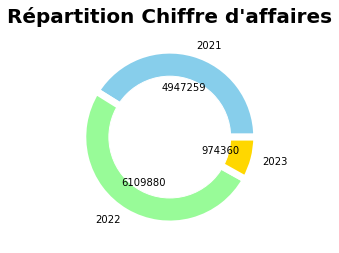

In [7]:
names= ['2021', '2022', '2023']
size= CAT.CA

p, tx, autotexts = plt.pie(size, 
                           labels= names, 
                           colors= ['skyblue', 'palegreen', 'gold'], 
                           wedgeprops = { 'linewidth' : 7, 
                                         'edgecolor' : 'white' },
                           autopct= '')

#boucle pour faire  apparaitre le chiffre d'affaires sur le graphique
for i, a in enumerate(autotexts): 
    a.set_text("{}".format(size[i]))

#Création de la forme Donut.
p = plt.gcf()
circle = plt.Circle( (0,0), 0.7, color='white') #création du cercle
p.gca().add_artist(circle)

plt.title('Répartition Chiffre d\'affaires', fontsize = 20, 
          fontweight="bold");

Le chiffre d'affaires de 2021 est de 4 947 259 €. sachant que le Mois d'octobre n'est pas basé sur des valeurs réelles pour la cat 1 mais sur la moyenne du chiffre des quelques jours présents en octobre 21. Et l'année n'est pas entière mais de Mars 2021 à Décembre 2021.

Le chiffre d'affaires de 2022 est de 6 109 880€. 

Le chiffre d'affaires de 2023 est de 974 360€ pour Janvier à Février 2023. 

<a class="anchor" id="II.a.1.ii"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Centrale </h2>


In [8]:
Mean=ventes.price.mean()
Mean

5493.835860273933

In [9]:
Median=ventes.price.median()
Median

5570.769999999975

Suite à l'analyse Centrale, on constate que le chiffre d'affaires par jour moyen tourne autour 5 494€ avec une Médiane à 5 570€.

<a class="anchor" id="II.a.1.iii"></a>

<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Forme </h2>



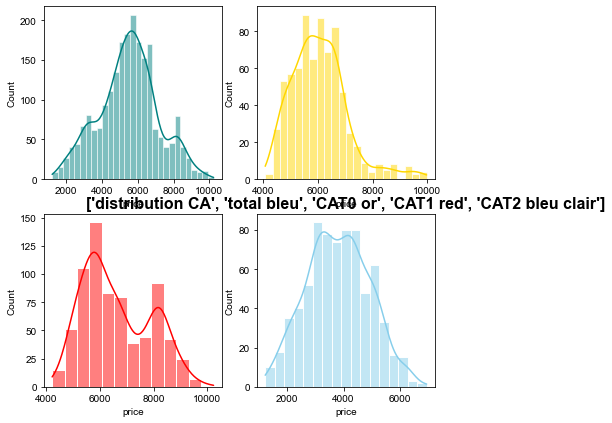

In [10]:
# filtrer par catégorie
c0=ventes[ventes['categ']==0]
c1=ventes[ventes['categ']==1]
c2=ventes[ventes['categ']==2]

# création d'un graphique à 4 sections pour la distribution Total et par catégorie.
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.set(style="darkgrid")

sns.histplot(data= ventes, x="price", 
             kde=True, color="teal",
             ax=axs[0,0] )


sns.histplot(data= c0, x="price",
             color="gold", kde=True, 
             ax=axs[0,1], label="C0")

sns.histplot(data= c1, x="price",
             color="red", kde=True, 
             ax=axs[1,0])

sns.histplot(data= c2, x="price",
             color="skyblue", kde=True, 
             ax=axs[1,1])

plt.title(['distribution CA','total bleu', 'CAT0 or',
           "CAT1 red", "CAT2 bleu clair"], fontsize = 16, fontweight="bold") ;


In [11]:
#skewness total
ventes.price.skew()

-0.015410723766369807

Symétrique voir légèrement étalée à gauche car proche de 0.

In [12]:
#skewness Catégorie 2
c2.price.skew()

0.06803519588436621

Symétrique voir légèrement étalée à droite car proche de 0.

In [13]:
#skewness Catégorie 0
c0.price.skew()

0.984710981431046

In [14]:
#skewness Catégorie 1
c1.price.skew()

0.4394452429254462

La distribution est étalée sur la droite car éloignée de 0. Ce qui signifie que la médiane est plus petite que la Moyenne sur ces catégories.

In [15]:
# Kurtosis empirique total
ventes.price.kurtosis()

-0.17546084847325316

Distribution quasi Normale car proche de 0. Légèrement moins concentré.

In [16]:
# Kurtosis empirique Catégorie 1
c1.price.kurtosis()

-0.8587725096399406

In [17]:
# Kurtosis empirique Catégorie 2
c2.price.kurtosis()

-0.48131559396716783

La distribution moins concentrée car le kurtosis est négatif. 

In [18]:
# Kurtosis empirique Catégorie 0
c0.price.kurtosis()

1.6966636252124259

La Distribution est très concentrée car le kurtosis est plus grand que 0. 

l'indice de GINI est de = 0.17005418181422838


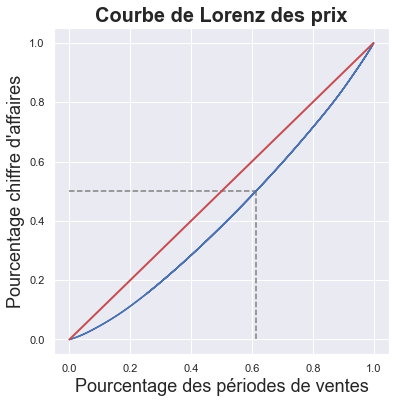

In [19]:
# cumul du prix par ordre croissant divisé par le chiffre d'affaires total
Lorenz = np.cumsum(np.sort(ventes.price)) / ventes.price.sum()
# pour rajouter l'information 0 pour que la courbe commence à 0.
Lorenz = np.append([0], Lorenz)
#Nombre de ventes
n=len(ventes.price)

# personnaliser l'axe des abscisses.
xaxis= np.linspace(0-1/n, 1+1/n, n+1)
plt.figure(figsize=(6,6))
plt.plot(xaxis, Lorenz, drawstyle='steps-post')
plt.plot([0.0, 1.0], [0.0, 1.0], 'r-', lw=2)
medial= Lorenz[(Lorenz < 0.5)].size / Lorenz.size
plt.hlines(y=0.5, xmin=0, xmax=medial, color= "gray", ls='--' )
plt.vlines(x=medial, ymin=0, ymax=0.5, color= "gray", ls='--')

plt.ylabel("Pourcentage chiffre d'affaires", fontsize = 18)
plt.xlabel("Pourcentage des périodes de ventes", fontsize = 18)
plt.title("Courbe de Lorenz des prix", fontsize = 20, fontweight="bold"); 

AUC = (Lorenz.sum() -Lorenz[-1]/2 -Lorenz[0]/2)/n
S = 0.5- AUC
Gini = 2*S
print('l\'indice de GINI est de =',Gini)


Au vu de l'indice de Gini proche de 0, la répartition des chiffres d'affaires est quasi équilibrée. Près de  60% de la période représente 50% du chiffre d'affaires. 

<a class="anchor" id="II.a.1.iv"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Dispersion </h2>

In [20]:
Variance= ventes.price.var(ddof=0)
Variance

2750695.5004611085

In [21]:
Ecartype=ventes.price.std(ddof=0)
Ecartype

1658.5220831997108

il y a un écart moyen de 1 658,5€ sur les chiffres d'affaires par jour. 

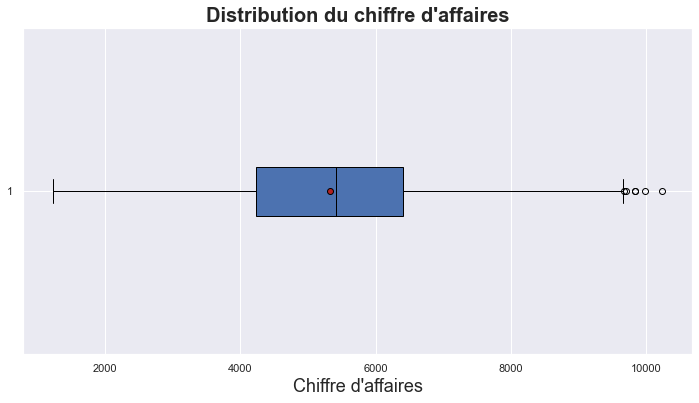

In [22]:
Modalites= ventes.price.unique() #pour avoir les différentes valeurs

Medianpropos = {'color' :'black'}
Meanprops= {'marker' : 'o',
            'markeredgecolor' : 'black', 
            'markerfacecolor' : 'firebrick'}

plt.figure(figsize=(12,6))
plt.boxplot(Modalites, showfliers=True, 
            medianprops= Medianpropos, vert = False,
            patch_artist= True, showmeans= True, 
            meanprops=  Meanprops);

plt.xlabel("Chiffre d'affaires", fontsize = 18)

plt.title("Distribution du chiffre d'affaires", fontsize = 20, 
          fontweight="bold");


La distribution du chiffre d'affaires générale a 25% des CA vers 4000€, 50% des CA vers 5500€, 75% vers 6500€ et les 100% vers 9000€.  

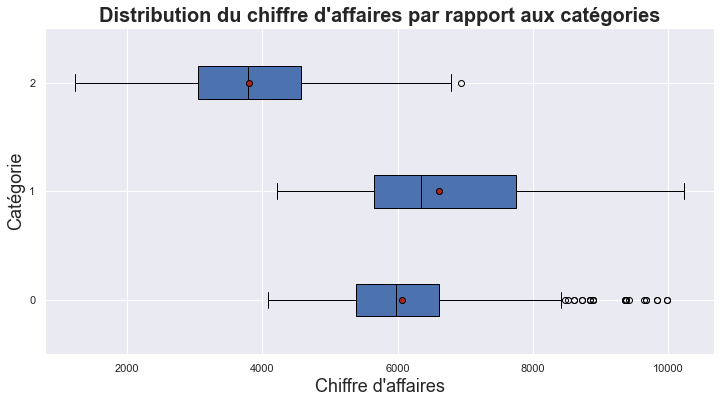

In [23]:
Modalites= ventes.categ.drop_duplicates().sort_values()
groupes= []

for m in Modalites:
    groupes.append(ventes[ventes['categ']==m]['price'])
    
Medianpropos = {'color' :'black'}
Meanprops= {'marker' : 'o',
            'markeredgecolor' : 'black', 
            'markerfacecolor' : 'firebrick'}

names= [0,1,2]
plt.figure(figsize=(12,6))
plt.boxplot(groupes, showfliers=True, 
            medianprops= Medianpropos, vert = False, 
            patch_artist= True, showmeans= True, 
            meanprops=  Meanprops,
            labels= names);

plt.xlabel("Chiffre d'affaires", fontsize = 18)
plt.ylabel("Catégorie", fontsize = 18)
plt.title("Distribution du chiffre d'affaires par rapport aux catégories", 
          fontsize = 20, fontweight="bold");


La distribution est très différente suivant la catégorie de produit. On remarque que la catégorie 1 est la plus étendue entre 4000€ par jour et 10000€. 
La catégorie 2 elle s'étend sur les chiffres d'affaires les moins élevés entre 1000€ et 7000€.
Et enfin la catégorie 0 entre 4000€ et 8000€. 

<div style="background-color: #F5A9C6;">
    <a class="anchor" id="II.a.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#75515F;"> 2. Temporelle<a class="anchor" id="II.a.2"></a>

In [24]:

#Rajouter des colonnes détaillant les données temporelles 
ventes["annee"] = ventes["Dates"].map(lambda d: d.year)
ventes["trimestre"] = ventes["Dates"].map(lambda d: d.quarter)
ventes["mois"] = ventes["Dates"].map(lambda d: d.month_name())
ventes["mois_num"] = ventes["Dates"].map(lambda d: d.month)
ventes["semaine"] = ventes["Dates"].map(lambda d: d.week)
ventes["jour"] = ventes["Dates"].map(lambda d: d.day)
ventes["jour_sem"] = ventes["Dates"].map(lambda d: d.day_name())
ventes["jour_sem_num"] = ventes["Dates"].map(lambda d: d.weekday()+1)
ventes["quart_mois"] = [int((jour-1)*4/31)+1 for jour in ventes["jour"]]


# Rajouter une colonne Vacances
Holy= pd.DataFrame(['2021-01-01','2021-04-05','2021-05-01','2021-05-08',
'2021-05-13','2021-05-24','2021-07-14','2021-08-15','2021-11-01',
'2021-11-11','2021-12-25',
'2022-01-01','2022-04-18','2022-05-01',
'2022-05-08','2022-05-26','2022-06-06','2022-07-14','2022-08-15',
'2022-11-01','2022-11-11','2022-12-25','2023-01-01','2023-04-10',
'2023-05-01','2023-05-08','2023-05-18','2023-05-29','2023-07-14',
'2023-08-15','2023-11-01','2023-11-11','2023-12-25'], columns=['date'])
vac=Holy.date
ventes["Vac"] = ventes["Dates"].isin(vac) 

#Rajouter une colonne Week end
WEEKEND=ventes[(ventes['jour_sem']=='Saturday'
               ) | (ventes['jour_sem']=='Sunday'
                   )][["jour_sem"]].drop_duplicates()
WEEKEND=WEEKEND.jour_sem
ventes["weekend"] = ventes["jour_sem"].isin(WEEKEND)


In [25]:
#Créer une nouvelle table en indexant par date
ventesDay= ventes.set_index(["Dates"])

#Retyper la colonne index en format date
ventesDay.index= pd.to_datetime(ventesDay.index, 
                                format='%Y-%m-%d %H:%M:%S')


#Resample cette table pour créer des tables suivants les différentes temporalités en regroupant les catégories
ventesYear= ventesDay.resample("Y").sum().reset_index()
ventesMonth= ventesDay.resample("M").sum().reset_index()
ventesbiWeek=ventesDay.resample("14d").sum().reset_index()
venteday=ventesDay.resample("d").sum()
ventesday=venteday.reset_index()

<a class="anchor" id="II.a.2.i"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Croissance </h2>

In [26]:
#Chiffre d'affaires ventes par Trimestre.
A22T1= ventes[(ventes["Dates"]>="2022-01-01"
              ) &(ventes["Dates"]<"2022-02-28")][["price"]].sum()

A22T4= ventes[(ventes["Dates"]>="2022-11-01"
              ) &(ventes["Dates"]<"2022-12-31")][["price"]].sum()


Pour calculer la croissance du chiffre d'affaires, j'ai d'abord calculé le chiffre d'affaires par année. J'ai ensuite appliqué la formule suivante: ( N -  N-1 ) / N-1.

In [27]:
# croissance 2021-2022
((CA22-CA21)/CA21)*100

price    23.500306
dtype: float64

In [28]:
# croissance 1er trim 2022 et 1er trim 2023
((CA23 - A22T1)/A22T1)*100

price   -6.509493
dtype: float64

In [29]:
# croissance 4er trim 2022 et 1er trim 2023
((CA23-A22T4)/A22T4)*100

price   -1.744604
dtype: float64

On remarque une augmentation de 23% du chiffre d'affaires entre 2021 et 2022, puis une diminution de 1% entre les derniers mois 2022 et les premiers mois 2023. 
J'ai comparé les premiers mois 2022 et les premiers mois 2023 et on constate également une baisse de 6% pour la même période entre ces 2 années. 

<a class="anchor" id="II.a.2.ii"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Moyenne par an </h2>

In [30]:
# Regroupement des ventes par année
D21= ventes[ventes["Dates"]<="2021-12-31"][["price","Dates"]]

D22= ventes[(ventes["Dates"]>="2022-01-01"
            ) &(ventes["Dates"]<"2022-12-31")][["price","Dates"]]

D23= ventes[ventes["Dates"]>"2022-12-31"][["price","Dates"]]


In [31]:
D21.price.mean()

5389.171845315892

In [32]:
D22.price.mean()

5581.031950549441

In [33]:
D23.price.mean()

5504.859717514104

Le chiffre d'affaires moyen a été le plus élevé en 2022 autour des 5 581€ puis il est passé  à 5 504€ en 2023.

<a class="anchor" id="II.a.2.iii"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Répartition dans le temps </h2>

#### Evolution global du Chiffre d'affaires. 

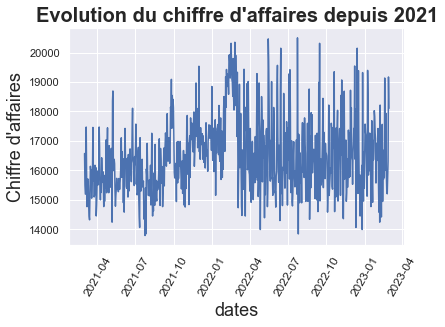

In [34]:
plt.plot(ventesday.Dates, ventesday.price)
plt.xticks(fontsize=12, rotation=60)
plt.xlabel("dates", fontsize = 18)
plt.ylabel("Chiffre d'affaires", fontsize = 18)

plt.title("Evolution du chiffre d'affaires depuis 2021", fontsize = 20, 
          fontweight="bold");


#### Evolution du Chiffre d'affaires suivant la Catégorie

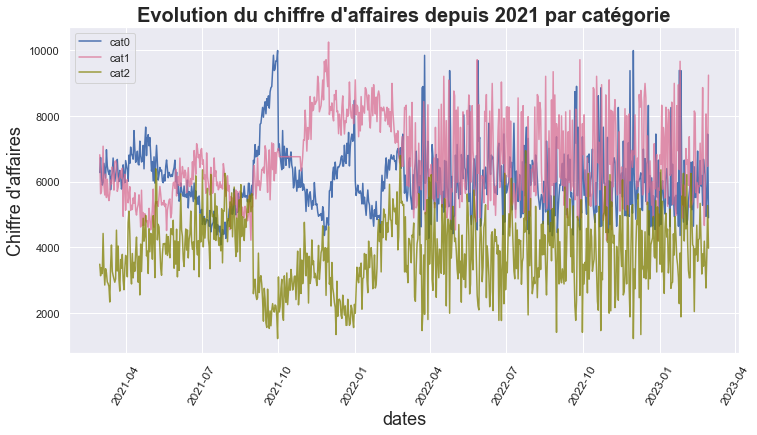

In [35]:
v0=ventes[ventes["categ"]==0].sort_values(by=['Dates'], ascending=True)
v0["moyenne"]=v0.price.rolling(window=7, center= True).mean()
v1=ventes[ventes["categ"]==1].sort_values(by=['Dates'], ascending=True)
v1["moyenne"]=v1.price.rolling(window=7, center= True).mean()
v2=ventes[ventes["categ"]==2].sort_values(by=['Dates'], ascending=True)
v2["moyenne"]=v2.price.rolling(window=7, center= True).mean()

fig, ax= plt.subplots(figsize=(12,6))
#adaptation de l'axe abscisse de la date pour alléger l'affichage
monthly_locator = mdates.MonthLocator()
half_year_locator = mdates.MonthLocator(interval=3)
#ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
# Créer le graphique
ax.plot(v0.Dates, v0.price)
ax.plot(v1.Dates, v1.price, alpha=0.75,color="palevioletred" )
ax.plot(v2.Dates, v2.price, alpha=0.75, color='olive')
plt.legend(["cat0", "cat1", "cat2"])
plt.xticks(fontsize=12, rotation=60)
plt.xlabel("dates", fontsize = 18)
plt.ylabel("Chiffre d'affaires", fontsize = 18)
plt.title("Evolution du chiffre d'affaires depuis 2021 par catégorie",
          fontsize = 20, fontweight="bold");



#### Evolution du Chiffre d'affaires lissé. 

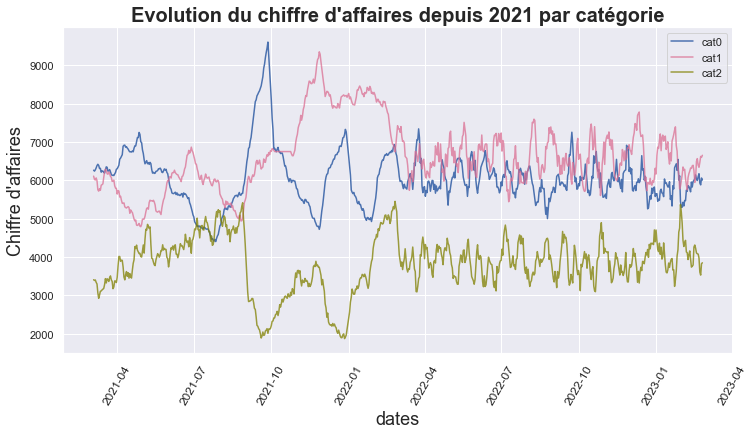

In [36]:
fig, ax= plt.subplots(figsize=(12,6))
#adaptation de l'axe abscisse de la date pour alléger l'affichage
monthly_locator = mdates.MonthLocator()
half_year_locator = mdates.MonthLocator(interval=3)
#ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
# Créer le graphique
ax.plot(v0.Dates, v0.moyenne)
ax.plot(v1.Dates, v1.moyenne, alpha=0.75,color="palevioletred" )
ax.plot(v2.Dates, v2.moyenne, alpha=0.75, color='olive')
plt.legend(["cat0", "cat1", "cat2"])
plt.xticks(fontsize=12, rotation=60)
plt.xlabel("dates", fontsize = 18)
plt.ylabel("Chiffre d'affaires", fontsize = 18)
plt.title("Evolution du chiffre d'affaires depuis 2021 par catégorie",
          fontsize = 20, fontweight="bold");




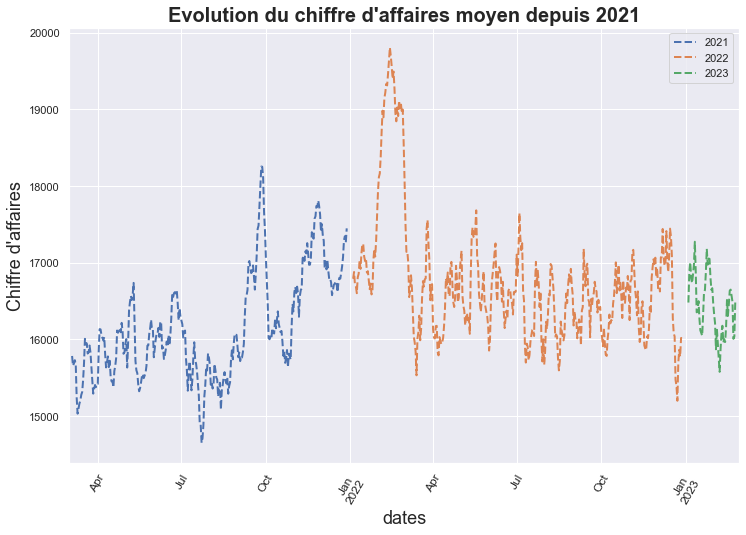

In [37]:
plt.figure(figsize=(12,8))

# Méthode du Rolling pour lisser sur des moyennes de 7 jours décalés 
venteday.loc["2021", "price"
            ].rolling(window=7, center= True
                     ).mean().plot(label='moving average', 
                                   lw=2, ls='dashed')
venteday.loc["2022", "price"
            ].rolling(window=7, center= True
                     ).mean().plot(label='moving average', 
                                   lw=2, ls='dashed')
venteday.loc["2023", "price"
            ].rolling(window=7, center= True
                     ).mean().plot(label='moving average', 
                                   lw=2, ls='dashed')

plt.legend(["2021", "2022", "2023"])
plt.xticks(fontsize=12, rotation=60)
plt.xlabel("dates", fontsize = 18)
plt.ylabel("Chiffre d'affaires", fontsize = 18)
plt.title("Evolution du chiffre d'affaires moyen depuis 2021", 
          fontsize = 20, fontweight="bold");

On constate que la tendance générale du Chiffre d'affaires entre 2021 et mars 2022, est plutôt croissante. Puis cette tendance s'est inversée à partir de avril 2022. 

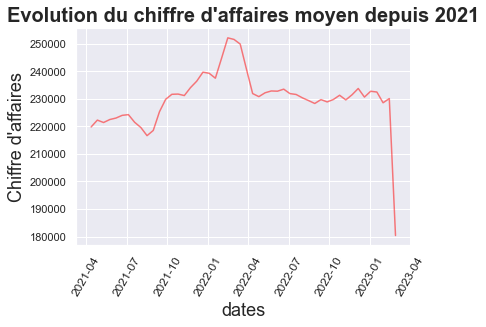

In [38]:
# Calculer le chiffre d'affaires moyen toutes les 4 semaines Pour lisser le bruit
ventesbiWeek["moyenne"]= ventesbiWeek.price.rolling(4).mean()
# tracer la courbe
plt.plot(ventesbiWeek.Dates,ventesbiWeek.moyenne,alpha=0.5,color="red")

plt.xticks(fontsize=12, rotation=60)
plt.xlabel("dates", fontsize = 18)
plt.ylabel("Chiffre d'affaires", fontsize = 18)
plt.title("Evolution du chiffre d'affaires moyen depuis 2021", 
          fontsize = 20, fontweight="bold");


En réduisant l'échelle double hebdomadaire, cette tendance est encore plus marquée. Par ailleurs, on constate que sur les dernières semaines de 2023 le chiffre d'affaires  moyen a drastiquement baissé comparé aux précédentes semaines.

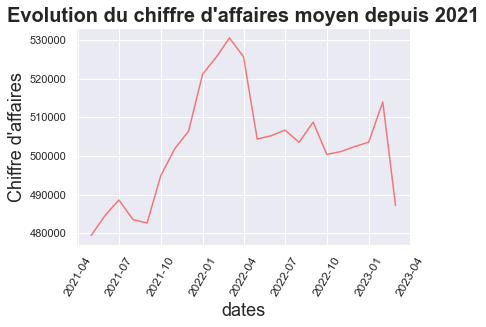

In [39]:
# Calculer le chiffre d'affaires moyen tous les 2 mois Pour lisser le bruit
ventesMonth["moyenne"]= ventesMonth.price.rolling(2).mean()
# tracer la courbe
plt.plot(ventesMonth.Dates, ventesMonth.moyenne, alpha=0.5,color="red")

plt.xticks(fontsize=12, rotation=60)
plt.xlabel("dates", fontsize = 18)
plt.ylabel("Chiffre d'affaires", fontsize = 18)
plt.title("Evolution du chiffre d'affaires moyen depuis 2021", 
          fontsize = 20, fontweight="bold");


Et enfin en réduisant à l'échelle mensuelle, cette tendance pour l'année 2023 se confirme. On constate donc une chute progressive du chiffre d'affaires. Il sera nécessaire de vérifier le nombre de ventes pour vérifier si il y a une réelle baisse ou si on rencontre un effet de prix avec un chiffre d'affaires en baisse mais des ventes constantes. 

Coefficient Saisonnier Mensuel, jour 

In [40]:
def coef(tab, periode):
    CAT= tab.groupby(periode).sum()[['price']]# CA pour chaque période
    MT= tab.groupby(periode).mean()[['price']]# Moyenne pour chaque période
    TM= MT.sum()/len(MT) #Moyenne totale des périodes
    coeff= MT/TM #Coefficient Saisonnié
    
    return (coeff.sort_values(by=[periode], ascending= True))

def graph(periodes):
    periode=coef(ventes,periodes)
    periode0=coef(v0,periodes)
    periode1=coef(v1,periodes)
    periode2=coef(v2,periodes)
    
    plt.figure(figsize=(12,6))
    plt.plot(periode.index, periode.price, marker='s')
    plt.plot(periode0.index, periode0.price, marker='s')
    plt.plot(periode1.index, periode1.price, marker='s')
    plt.plot(periode2.index, periode2.price, marker='s')
    
    plt.grid(color='lightgray', linestyle='solid')
    plt.legend([periodes, "cat0", "cat1", "cat2"])
    plt.xlabel(periodes, fontsize = 18)
    plt.ylabel("Coefficient Saisonnier", fontsize = 18)
    plt.title(f"Coefficient Saisonnier sur les Chiffres d'affaires des ventes par {periodes}", 
              fontsize = 20, fontweight="bold");
    

In [41]:
v0=ventes[ventes["categ"]==0].sort_values(by=['Dates'], ascending=True)
v1=ventes[ventes["categ"]==1].sort_values(by=['Dates'], ascending=True)
v2=ventes[ventes["categ"]==2].sort_values(by=['Dates'], ascending=True)

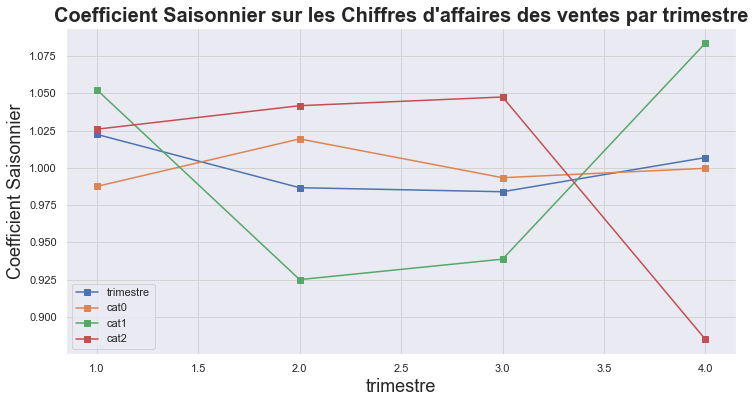

In [42]:
graph('trimestre')

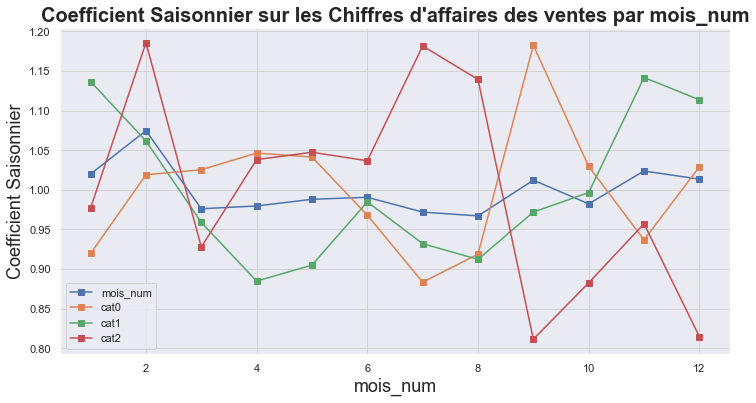

In [43]:
graph("mois_num")

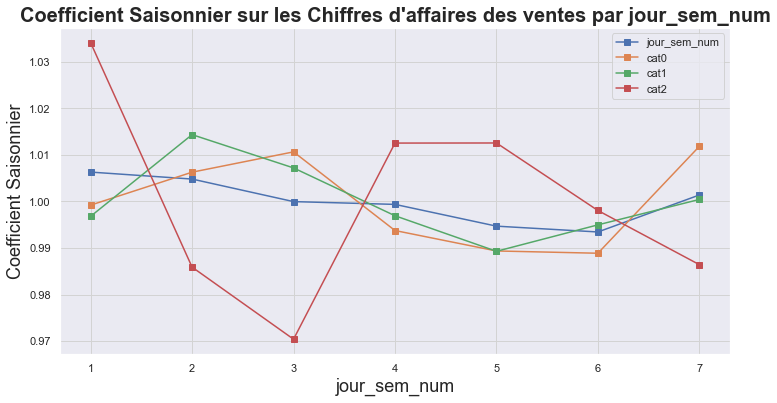

In [44]:
graph("jour_sem_num")

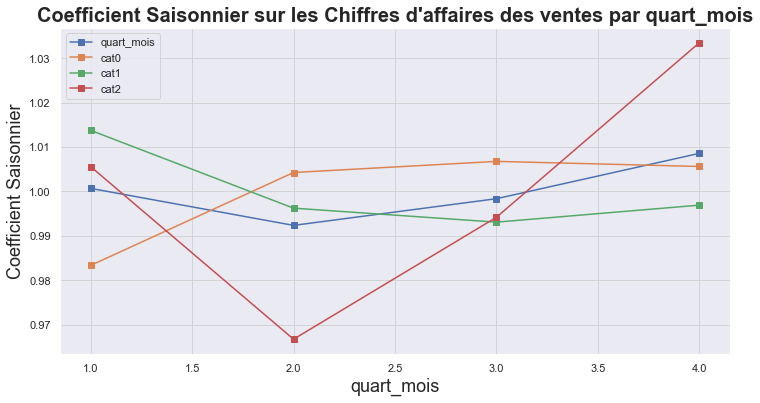

In [45]:
graph( "quart_mois")

In [46]:
coef(ventes,"Vac")

,price
Vac,
False,0.998571
True,1.001429


In [47]:
coef(ventes,'weekend')

,price
weekend,
False,1.001818
True,0.998182


On remarque qu'il y a effectivement des variations sur les ventes suivant les périodes et les catégories.

<a class="anchor" id="II.a.2.iv"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Prévision </h2>

In [48]:
# Régression des Moindres Carrés
def mc(tab, nb1, prix, predic, période):
    tab["cumul"]= np.arange(1,nb1)# décompter chaque période
    xi= tab["cumul"]
    yi= tab[prix]
    xim= xi.mean() #Moyenne du nombre de périodes
    yim= yi.mean() #Moyenne des chiffres d'affaires
    Xi= xi - xim #supprimer la valeur moyenne de toutes les périodes
    Yi= yi - yim #supprimer la valeur moyenne de tous les CA
    XiYi= Xi * Yi # Multiplier les valeurs supp des périodes par ceux des CA
    XiYis= XiYi.sum() # additionner ces multiplications
    Xi2= pow(Xi,2) #mettre les périodes de valeurs supprimées au carré
    Xi2s=Xi2.sum() # additionner ces carrés
    a= XiYis/Xi2s # calculer a de ax+b en divisant la somme des multiple par la somme des carrés
    b=yim-(a*xim) # Calculer b moyenne de CA moins a multiplié par moyene période
    m1= (a*predic)+b # montant de prédiction en multipliant a par la période à prédire plus additionner b
    plt.plot(xi, yi, 'o')
    plt.plot(np.arange(predic), [a*x+b for x in np.arange(predic)]) # courbe R
    plt.xlabel("mois", fontsize = 18)
    plt.ylabel('montant', fontsize = 18)
    plt.title(f"Prédiction du Chiffre d'affaires des ventes pour le {predic}e {période}", 
              fontsize = 20, fontweight="bold");
    return(print(f'prédiction du {predic}e {période}: {m1}€'), plt.show())

prédiction du 25e mois: 507663.4334130413€


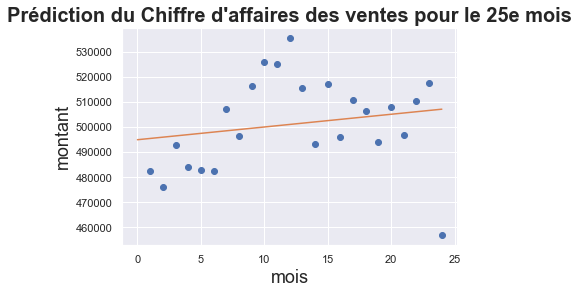

In [49]:
mc(ventesMonth, len(ventesMonth)+1, "price", 25, "mois" );

On constate que le  chiffre d'affaires d'avril 2023 augmentera à 507 663€

In [50]:
v2022= ventes[ventes["annee"]==2022]
v2022= v2022.groupby("mois_num").sum()

prédiction du 13e mois à partir 2022: 495945.4586363617€


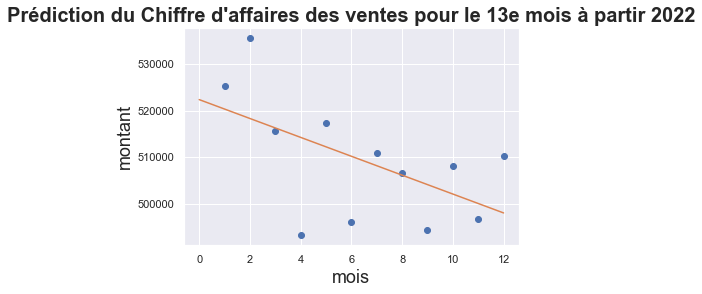

In [51]:
mc(v2022,len(v2022)+1, "price", 13,"mois à partir 2022");

Par contre en se basant seulement sur les données de 2022, la prédiction est à la baisse.

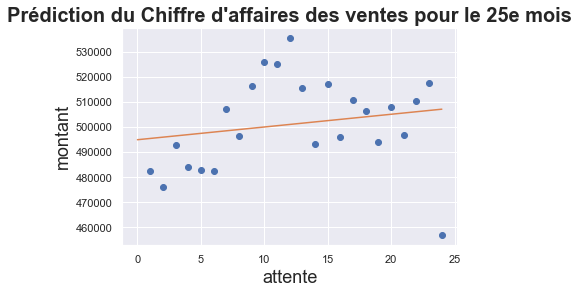

In [52]:
# Autre méthode pour calculer la régression.

ventesMonth["cumul"]= np.arange(1,25)
Y = ventesMonth['price']
X = ventesMonth[['cumul']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
c,d = result.params['cumul'],result.params['intercept']

 
plt.plot(ventesMonth.cumul,ventesMonth.price, "o")
plt.plot(np.arange(25),[c*x+d for x in np.arange(25)])

plt.xlabel("attente", fontsize = 18)
plt.ylabel("montant", fontsize = 18)
plt.title("Prédiction du Chiffre d'affaires des ventes pour le 25e mois", 
          fontsize = 20, fontweight="bold");
plt.show()

<div style="background-color: #F5A9C6;">
    <a class="anchor" id="II.a.3"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#75515F;"> 3. Répartition<a class="anchor" id="II.a.3"></a>

<a class="anchor" id="II.a.3.i"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Demande par Catégorie </h2>

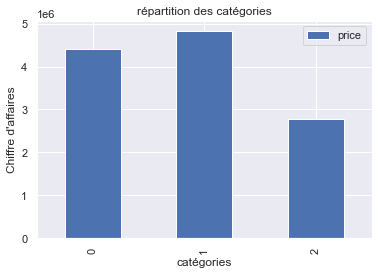

In [53]:
# Création tableau regroupant par catégorie le chiffre d'affaires
cat=ventes.groupby('categ')[['price']].sum()

cat.plot.bar()
plt.title("répartition des catégories")
plt.xlabel("catégories") 
plt.ylabel("Chiffre d'affaires");


On remarque la catégorie 1 représente le chiffre d'affaires le plus important sachant que le mois d'octobre 21 de cette catégorie a été calculé suivant la moyenne des seules quelques jours présents.

<a class="anchor" id="II.a.3.ii"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Part de Marché </h2>

Pour pouvoir comparer sa position sur le marché du livre j'ai calculé le nombre de livre vendu par rapport au marché en France avec la formule suivante: (Quantité vendue par l'entreprise / Quantité vendues dans le marché) *100. 
Une étude sur le marché du livre en France de GfK Market & Consumer Intelligence montre que 324 millions d'exemplaires de livres neufs ont été vendus en 2020.
Source: https://www.gfk.com/fr/insights/france-achat-6-millions-livres-2020

In [54]:
Nb2022=len(transac[(transac["Dates"]> "2021-12-31"
                   )& (transac["Dates"]< "2023-01-01")])
(Nb2022 / 324000000 )*100

0.10694444444444445

L'entreprise représente 0,1% des ventes. 

J'ai appliqué la même formule pour déterminer le poids au niveau du chiffre d'affaires généré sur les ventes de livre par rapports aux ventes de livre en France. D'après la même étude, le marché Français représente 3,7 milliards €. 

In [55]:
(CA22/ 3700000000)*100

price    0.165132
dtype: float64

L'entreprise représente 0,16% du chiffre d'affaires du marché.

<div style="background-color: #F56086;">
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#36151D;">b) Références  <a class="anchor" id="II.b"></a> </h2>
</div>

<div style="background-color: #F5A9C6;">
    <a class="anchor" id="II.b.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#75515F;"> 1. Descriptive <a class="anchor" id="II.b.1"></a>

In [56]:
produit= transac[['id_prod','categ', 'price']].drop_duplicates()
produit.price.mean()

21.757039191671772

Le prix moyen des livres vendus est de 21,75€.

In [57]:
# Table prix moyen pour chaque catégorie
moyen=produit.groupby("categ").mean()[['price']]
moyen=moyen.reset_index()
moyen

,categ,price
0,0,11.714008
1,1,25.503623
2,2,107.636017


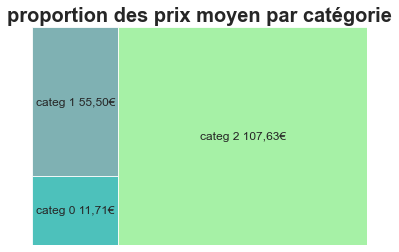

In [58]:
#tree map 

squarify.plot(sizes=moyen['price'], 
              label=['categ 0 11,71€',"categ 1 55,50€","categ 2 107,63€"], 
              alpha=.8, 
              color=["lightseagreen","cadetblue","lightgreen"])
plt.axis('off')
plt.title("proportion des prix moyen par catégorie", 
          fontsize = 20, fontweight="bold");
plt.show()


On constate que le prix moyen de la catégorie 2 est plus importante que les 2 autres catégories.

<div style="background-color: #F5A9C6;">
    <a class="anchor" id="II.b.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#75515F;"> 2. Répartition <a class="anchor" id="II.b.1"></a>

<a class="anchor" id="II.b.2.i"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Nombre de Références Uniques</h2>

In [59]:
len(transac.id_prod.unique())

3266

Il y a près de 3 266 livres différents vendus en ligne.

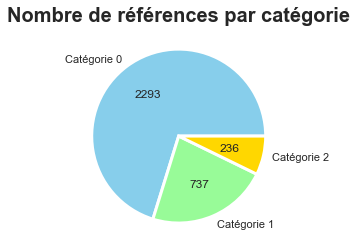

In [60]:
# Nombres références livre vendus en ligne par catégorie
pc= produit.groupby("categ")[["id_prod"]].count() 

names= ["Catégorie 0", "Catégorie 1", "Catégorie 2"]
size= pc.id_prod
p,tx, autotexts = plt.pie(size, labels=names,
                           colors= ['skyblue', 'palegreen', 'gold'],
                           wedgeprops = { 'linewidth' : 3, 
                                         'edgecolor' : 'white'},
                          autopct="")

#Pour faire apparaitre le nb de références sur le graphe
for i, a in enumerate(autotexts): 
    a.set_text("{}".format(size[i]))

plt.title("Nombre de références par catégorie", 
          fontsize = 20, fontweight="bold");
plt.show()


<a class="anchor" id="II.b.2.ii"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Distribution des Prix</h2>

l'indice de GINI est de = 0.7426272966767368


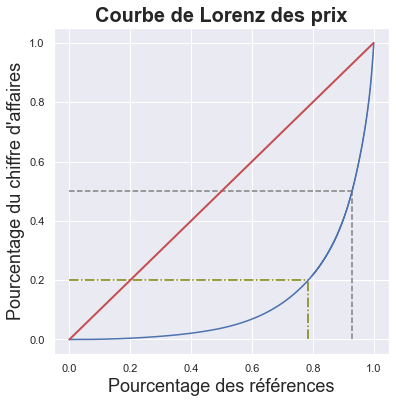

In [61]:
c=transac.groupby("id_prod").sum()[["price"]]
# cumul du prix par ordre croissant divisé par le chiffre d'affaires total
Lorenz = np.cumsum(np.sort(c.price)) / c.price.sum()
# pour rajouter l'information 0 pour que la courbe commence à 0.
Lorenz = np.append([0], Lorenz)
#Nombre de ventes
n=len(c.price)
# personnaliser l'axe des abscisses.
xaxis= np.linspace(0-1/n, 1+1/n, n+1)
plt.figure(figsize=(6,6))
plt.plot(xaxis, Lorenz, drawstyle='steps-post')
plt.plot([0.0, 1.0], [0.0, 1.0], 'r-', lw=2)
plt.ylabel("Pourcentage du chiffre d'affaires", fontsize = 18)
plt.xlabel("Pourcentage des références", fontsize = 18)
plt.title("Courbe de Lorenz des prix", fontsize = 20, fontweight="bold"); 
medial= Lorenz[(Lorenz < 0.5)].size / Lorenz.size
plt.hlines(y=0.5, xmin=0, xmax=medial, color= "gray", ls='--' )
plt.vlines(x=medial, ymin=0, ymax=0.5, color= "gray", ls='--')
pareto= Lorenz[(Lorenz < 0.2)].size / Lorenz.size
plt.hlines(y=0.2, xmin=0, xmax=pareto, color= "olive", ls='-.' )
plt.vlines(x=pareto, ymin=0, ymax=0.2, color= "olive", ls='-.')
AUC = (Lorenz.sum() -Lorenz[-1]/2 -Lorenz[0]/2)/n
S = 0.5- AUC
Gini = 2*S
print('l\'indice de GINI est de =',Gini)

90% des références représentent près de 50% du chiffre d'affaires total. La répartition est donc très déséquilibrée. Par ailleurs, on remarque qu'une deuxième loi est représentée, celle de Pareto qui indique que près de 20% du chiffre d'affaires est générée par 80% des références produits.

In [62]:
p=produit[["price"]]
p0=produit[produit["categ"]==0][["price"]]
p1=produit[produit["categ"]==1][["price"]]
p2=produit[produit["categ"]==2][["price"]]

Text(0.5, 1.0, "['distribution des prix', 'total', 'CAT0', 'CAT1', 'CAT2']")

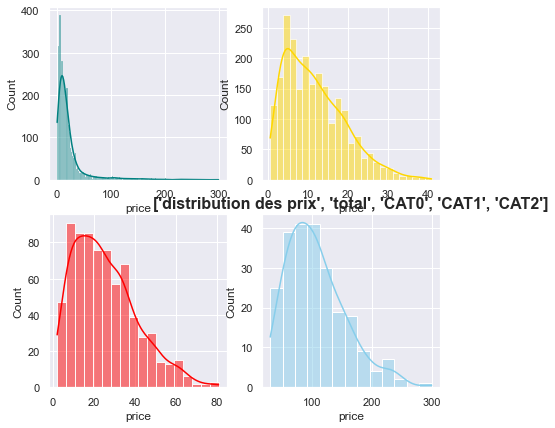

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.histplot(data= produit, x='price', kde=True,color="teal" , 
             ax=axs[0,0] )
sns.histplot(data= p0, x='price',color="gold", kde=True, ax=axs[0,1])
sns.histplot(data= p1, x='price',color="red", kde=True, ax=axs[1,0] )
sns.histplot(data= p2, x='price',color="skyblue", kde=True, ax=axs[1,1])

plt.title(['distribution des prix','total', 'CAT0', "CAT1", "CAT2"], 
          fontsize = 16, fontweight="bold") 


Suivant la catégorie, la distribution des prix varie énormément.

<a class="anchor" id="II.b.2.iii"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Demande par Catégorie </h2>

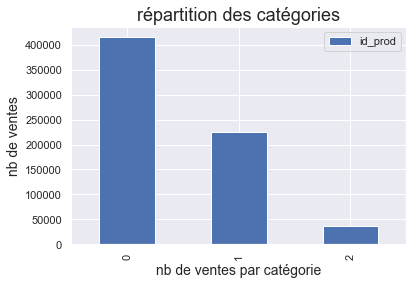

In [64]:
# Création d'un tableau dynamique regroupant par catégorie le nombre de références
cat=transac.pivot_table(['id_prod'],
                        ['categ'],
                        aggfunc='count',
                        margins=False)

cat.plot.bar()
plt.title("répartition des catégories", fontsize= 18)
plt.xlabel("nb de ventes par catégorie", fontsize= 14) 
plt.ylabel("nb de ventes", fontsize= 14);


On constate qu'il y a beaucoup de livres de catégorie 0 qui ont été vendu, autour de 400 000 ventes.
La Catégorie 1 a tout de même réussi a faire le chiffre d'affaires le plus important malgré un nombre de ventes moins élevé que pour la catégorie 0.

<a class="anchor" id="II.b.2.iv"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Demande en Volume </h2>

In [65]:
# regroupement du nombre de vente par an
Nb2021=len(transac[transac["Dates"]< "2022-01-01"])
Nb2022=len(transac[(transac["Dates"]> "2021-12-31"
                   )& (transac["Dates"]< "2023-01-01")])

Nb2023=len(transac[transac["Dates"]> "2022-12-31"])


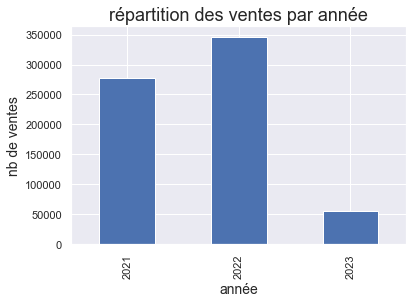

In [66]:
#Regrouper les informations dans une table pour créer un représentation graphique
nbTotal= pd.DataFrame((Nb2021,
                       Nb2022, 
                       Nb2023),
                      columns=['NbVentes'], 
                      index=["2021","2022", "2023"])

nbTotal.NbVentes.plot.bar()

plt.title("répartition des ventes par année", fontsize= 18)
plt.xlabel("année", fontsize= 14) 
plt.ylabel("nb de ventes", fontsize= 14);



Comme vu dans l'analyse du chiffre d'affaires, on a une augmentation du nombre de ventes entre 2021 et 2022. 2023 ne représente que 1 trimestre.

<a class="anchor" id="II.b.2.v"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Distribution des ventes</h2>

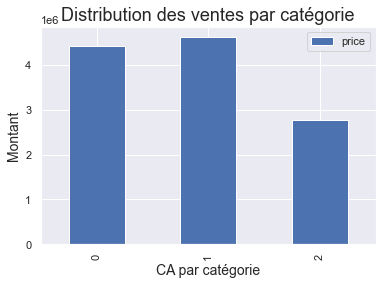

In [67]:
transac.groupby("categ")[["price"]].sum().plot.bar()

plt.title("Distribution des ventes par catégorie", fontsize= 18)
plt.xlabel("CA par catégorie", fontsize= 14) 
plt.ylabel("Montant", fontsize= 14);

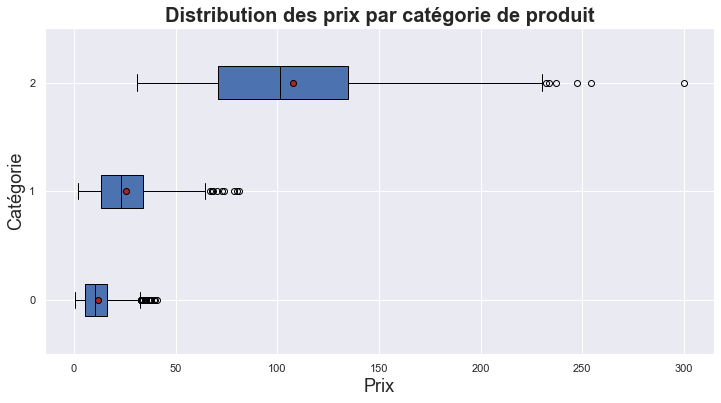

In [68]:
Modalites= produit.categ.drop_duplicates().sort_values()
groupes = []

for m in Modalites:
    groupes.append(produit[produit["categ"]==m]["price"])


Medianpropos = {'color' :'black'}
Meanprops= {'marker' : 'o', 'markeredgecolor' : 'black', 
            'markerfacecolor' : 'firebrick'}
plt.figure(figsize=(12,6))
plt.boxplot(groupes,labels=Modalites, showfliers=True, 
            medianprops= Medianpropos, vert = False, patch_artist= True, 
            showmeans= True, meanprops=  Meanprops);

title_name = "Distribution des prix par catégorie de produit"
plt.xlabel("Prix", fontsize = 18)
plt.ylabel("Catégorie", fontsize = 18)
plt.title(title_name, fontsize = 20, fontweight="bold");


Là également, la distribution est différente suivant la catégorie de produit. La catégorie 2 est la plus étendue entre 30€ et 225€. La catégorie 1 s'étend entre 5€ et 60€. Et enfin la catégorie 0 qui est le moins étendu entre 3€ et 40€.

<a class="anchor" id="II.b.2.vi"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Top 10</h2>

In [69]:
# chiffre d'affaires le plus important
transac.groupby("id_prod").sum().sort_values(by=["price"], 
                                             ascending=[False]
                                            )[["price"]].head(10)


,price
id_prod,
2_159,94893.50
2_135,69334.95
2_112,65407.76
2_102,60736.78
2_209,56971.86
1_395,53950.39
2_110,53846.25
1_369,53665.63
2_39,53060.85


On retrouve beaucoup de produits de la catégorie 2.

In [70]:
# Nombre de ventes le plus important
transac.groupby("id_prod").count().sort_values(by=["price"], 
                                               ascending=[False])[["session_id"]].head(10)


,session_id
id_prod,
1_369,2237
1_417,2173
1_414,2166
1_498,2117
1_425,2084
1_403,1950
1_412,1938
1_406,1931
1_413,1931


En terme de nombre de ventes, on retrouve exclusivement que des produits de catégorie 1.

<a class="anchor" id="II.b.2.vii"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Flop 10</h2>

In [71]:
# chiffre d'affaires le moins important
FlopCA=transac.groupby("id_prod").sum().sort_values(by=["price"], 
                                                    ascending=[True]
                                                   )[["price"]].head(10)
FlopCA

,price
id_prod,
0_1539,0.99
0_1284,1.38
0_1653,1.98
0_807,1.99
0_541,1.99
0_1601,1.99
0_1728,2.27
0_1498,2.48
0_898,2.54


In [72]:
# Nombre de ventes le moins important
Flopvente=transac.groupby("id_prod").count().sort_values(by=["price"], 
                                                         ascending=[True]
                                                        )[["session_id"]].head(10)
Flopvente

,session_id
id_prod,
0_1284,1
0_1379,1
0_886,1
0_1601,1
0_1151,1
0_833,1
0_807,1
0_2201,1
2_81,1


De nombreux produits n'ont été vendu que 1 fois depuis la mise en ligne du site.

<div style="background-color: #F5A9C6;">
    <a class="anchor" id="II.b.3"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#75515F;"> 3. Temporelle <a class="anchor" id="II.b.2"></a>

In [73]:
transacd= transac.set_index(["date"]) #indexer par date
transacd.index=  pd.to_datetime(transacd.index, format='%Y-%m-%d %H:%M:%S')

#distinction des catégories regroupant par dates pour avoir nombre vente.
cat0=transacd[transacd["categ"]==0
             ].groupby("Dates").count()[["id_prod"]].reset_index()
cat1=transacd[transacd["categ"]==1
             ].groupby("Dates").count()[["id_prod"]].reset_index()
cat2=transacd[transacd["categ"]==2
             ].groupby("Dates").count()[["id_prod"]].reset_index()


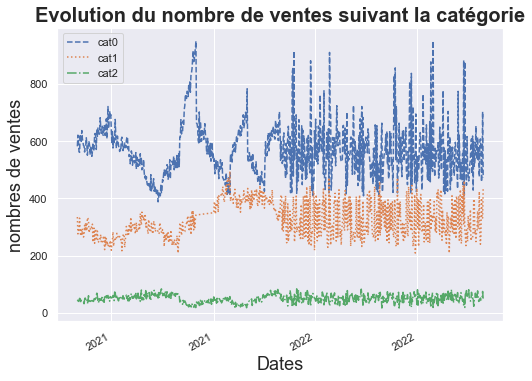

In [74]:
fig, ax = plt.subplots(figsize=(8, 6))
#adaptation de l'axe abscisse  de la date pour alléger l'affichage
monthly_locator = mdates.MonthLocator()
half_year_locator = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)

ax.plot(cat0.Dates, cat0.id_prod,linestyle='--')
ax.plot(cat1.Dates, cat1.id_prod,linestyle=':')
ax.plot(cat2.Dates, cat2.id_prod,linestyle='-.')

fig.autofmt_xdate() #mettre en diagonale la date
plt.xlabel("Dates", fontsize = 18)
plt.ylabel("nombres de ventes", fontsize = 18)
plt.title("Evolution du nombre de ventes suivant la catégorie", 
          fontsize = 20, fontweight="bold")
plt.legend(["cat0", "cat1", "cat2"])
plt.show()


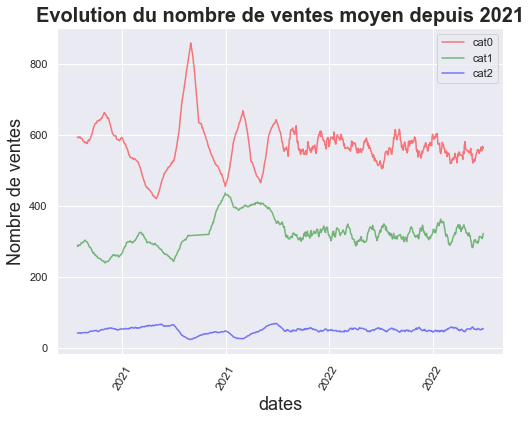

In [75]:
cat0["Moyenne"]=cat0.id_prod.rolling(14).mean()
cat1["Moyenne"]=cat1.id_prod.rolling(14).mean()
cat2["Moyenne"]=cat2.id_prod.rolling(14).mean()

fig, ax = plt.subplots(figsize=(8, 6))
monthly_locator = mdates.MonthLocator()
half_year_locator = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)

plt.plot(cat0.Dates, cat0.Moyenne, alpha=0.5,color="red" ) 
plt.plot(cat1.Dates, cat1.Moyenne, alpha=0.5,color="green" )
plt.plot(cat2.Dates, cat2.Moyenne, alpha=0.5,color="blue" )
plt.xticks(fontsize=12, rotation=60)
plt.xlabel("dates", fontsize = 18)
plt.ylabel("Nombre de ventes", fontsize = 18)
plt.legend(["cat0", "cat1", "cat2"])
plt.title("Evolution du nombre de ventes moyen depuis 2021", 
          fontsize = 20, fontweight="bold");


On distingue pas mal de variation dans le nombre suivants les périodes particulièrement pour la catégorie 0.
On constate par ailleurs que malgré la baisse du chiffre d’affaires en 2023, il n'y a pas de baisse du nombre de ventes. Ce qui signifie que la plupart des ventes générées en 2023 concernaient des produits avec un faible prix. 

<div style="background-color: #F5A9C6;">
    <a class="anchor" id="II.b.4"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#75515F;"> 4. Causalité <a class="anchor" id="II.b.3"></a>

<a class="anchor" id="II.b.4.i"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Flop</h2>

In [76]:
# j'ai repris l'index des top 10 flop afin d'avoir un visuel sur ces produits
flopvindex= Flopvente.index
transac.loc[transac["id_prod"].isin(flopvindex),:]

,id_prod,date,session_id,client_id,Dates,price,categ,sex,birth,age
189868,0_1284,2021-04-14 13:13:06.560397,s_20477,c_1551,2021-04-14,1.38,0,m,1972,50
198062,0_833,2021-09-27 23:22:40.394509,s_96558,c_8260,2021-09-27,2.99,0,m,1991,31
229392,0_1151,2021-09-17 05:58:49.213439,s_91113,c_2103,2021-09-17,2.99,0,f,1973,49
387414,0_1601,2021-03-07 18:55:24.042724,s_3132,c_1125,2021-03-07,1.99,0,f,1972,50
452632,0_807,2021-07-24 17:43:23.555852,s_66634,c_8273,2021-07-24,1.99,0,m,1991,31
472431,0_886,2021-03-17 03:34:14.461358,s_7410,c_7219,2021-03-17,21.82,0,f,1966,56
495782,0_2201,2021-10-15 09:59:39.794285,s_105077,c_1261,2021-10-15,20.99,0,m,1985,37
595585,0_1379,2021-10-16 09:19:09.546713,s_105547,c_5425,2021-10-16,2.99,0,f,1981,41
617123,2_23,2021-09-27 04:47:02.271354,s_96170,c_3976,2021-09-27,115.99,2,f,1992,30
648381,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,2022-02-19,86.99,2,m,1993,29


In [77]:
flopvindex= FlopCA.index
transac.loc[transac["id_prod"].isin(flopvindex),:]

,id_prod,date,session_id,client_id,Dates,price,categ,sex,birth,age
62941,0_541,2021-03-08 23:45:11.524853,s_3676,c_1869,2021-03-08,1.99,0,f,1985,37
189868,0_1284,2021-04-14 13:13:06.560397,s_20477,c_1551,2021-04-14,1.38,0,m,1972,50
202463,0_1539,2021-06-01 08:53:24.523722,s_42501,c_881,2021-06-01,0.99,0,f,1988,34
263290,0_1728,2021-04-19 13:48:18.949260,s_22772,c_2768,2021-04-19,2.27,0,f,1989,33
295158,0_1840,2021-11-06 06:09:13.114329,s_115438,c_7572,2021-11-06,1.28,0,f,1978,44
295159,0_1840,2023-01-06 06:09:13.114329,s_322712,c_7572,2023-01-06,1.28,0,f,1978,44
313487,0_1498,2022-02-19 08:31:04.439133,s_167516,c_1938,2022-02-19,2.48,0,f,1979,43
324525,0_898,2021-12-12 20:12:09.122337,s_133406,c_627,2021-12-12,1.27,0,f,1972,50
387414,0_1601,2021-03-07 18:55:24.042724,s_3132,c_1125,2021-03-07,1.99,0,f,1972,50
452632,0_807,2021-07-24 17:43:23.555852,s_66634,c_8273,2021-07-24,1.99,0,m,1991,31


In [78]:
# Visualisation des produits jamais vendus en ligne.
produitNL.sort_values(by=["price"], ascending=[False])

,Unnamed: 0,id_prod,price,categ
12,679344,2_87,220.99,2.0
14,679346,2_72,141.32,2.0
17,679349,2_86,132.36,2.0
13,679345,1_394,39.73,1.0
0,679332,0_1016,35.06,0.0
5,679337,1_0,31.82,1.0
11,679343,0_1025,24.99,0.0
16,679348,0_1624,24.50,0.0
19,679351,0_510,23.66,0.0
18,679350,0_299,22.99,0.0


<div style="background-color: #F56086;">
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#36151D;">c) Profils  <a class="anchor" id="II.c"></a> </h2>
</div>

<div style="background-color: #F5A9C6;">
    <a class="anchor" id="II.c.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#75515F;"> 1. Profilage <a class="anchor" id="II.c.1"></a>

<a class="anchor" id="II.c.1.i"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Nombre de clients</h2>

In [79]:
# table recense les différents clients.
client= transac[["client_id", "age","birth", "sex"]].drop_duplicates()

In [80]:
len(client.client_id)

8600

On constate qu'il y a près de 8600 clients sur la boutique en ligne.

<a class="anchor" id="II.c.1.ii"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Démographique</h2>

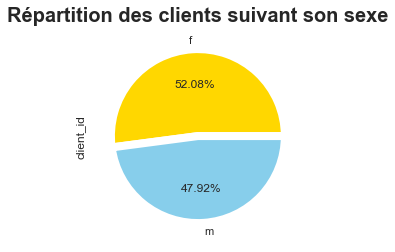

In [81]:
cx=client.groupby("sex").count()[["client_id"]] # regrouper par sexe

cx.client_id.plot.pie(colors= ['gold', 'skyblue'],
                      wedgeprops = { 'linewidth' : 8,
                                    'edgecolor' : 'white'}, 
                      autopct = lambda x: str(round(x, 2)) + '%');

plt.title("Répartition des clients suivant son sexe",
          fontsize = 20,fontweight="bold"); 

On constate que la présence féminine est plus importante que la population masculine. 

In [82]:
client.age.mean()

43.7393023255814

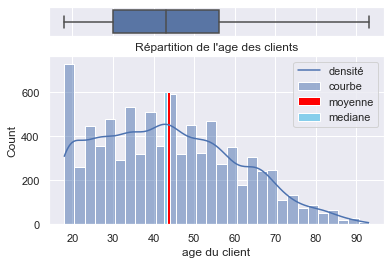

In [83]:
tm= client.age.mean()
tmed=client.age.median()

# Personnalisation du graphique en 2 graphiques
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": 
                                                 (.15, .85)})
# paramétrage des courbes

sns.boxplot(data=client, x="age", ax=ax_box)
sns.histplot(data=client, x="age", ax=ax_hist,kde=True)
plt.bar(tm, height=603, color="red")
plt.bar(tmed, height=603, color="skyblue")

plt.legend(["densité","courbe","moyenne", "mediane"])
plt.title("Répartition de l'age des clients")
ax_box.set(xlabel='')
ax_hist.set(xlabel='age du client');

Les clients ont entre 18 et 93 ans.
La moyenne et la médiane d'age se situe à 43 ans.
On remarque un gros pique pour l'age avant 20 ans. 

<div style="background-color: #F5A9C6;">
    <a class="anchor" id="II.c.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#75515F;"> 2. Montant <a class="anchor" id="II.c.2"></a>

<a class="anchor" id="II.c.2.i"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Répartition</h2>

l'indice de GINI est de = 0.44681341112797135


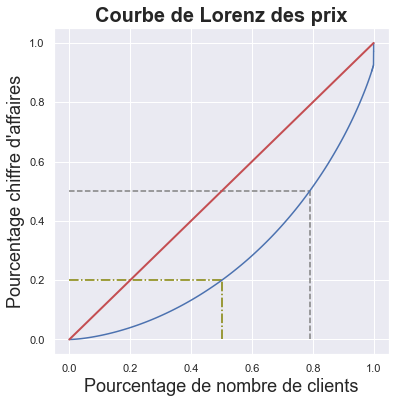

In [84]:
c=transac.groupby("client_id").sum()[["price"]]

# cumul du prix par ordre croissant divisé par le chiffre d'affaires total
Lorenz = np.cumsum(np.sort(c.price)) / c.price.sum() 
# pour rajouter l'information 0 pour que la courbe commence à 0.
Lorenz = np.append([0], Lorenz)

#Nombre de ventes
n=len(c.price)
# personnaliser l'axe des abscisses.
xaxis= np.linspace(0-1/n, 1+1/n, n+1)
plt.figure(figsize=(6,6))
plt.plot(xaxis, Lorenz, drawstyle='steps-post')
plt.plot([0.0, 1.0], [0.0, 1.0], 'r-', lw=2)
plt.ylabel("Pourcentage chiffre d'affaires", fontsize = 18)
plt.xlabel("Pourcentage de nombre de clients", fontsize = 18)
plt.title("Courbe de Lorenz des prix",fontsize = 20, 
          fontweight="bold");
medial= Lorenz[(Lorenz < 0.5)].size / Lorenz.size
plt.hlines(y=0.5, xmin=0, xmax=medial, color= "gray", ls='--' )
plt.vlines(x=medial, ymin=0, ymax=0.5, color= "gray", ls='--')
pareto= Lorenz[(Lorenz < 0.2)].size / Lorenz.size
plt.hlines(y=0.2, xmin=0, xmax=pareto, color= "olive", ls='-.' )
plt.vlines(x=pareto, ymin=0, ymax=0.2, color= "olive", ls='-.')

AUC = (Lorenz.sum() -Lorenz[-1]/2 -Lorenz[0]/2)/n
S = 0.5- AUC
Gini = 2*S
print('l\'indice de GINI est de =',Gini)


80% des clients ont réalisé un peu plus de 50% du chiffre d'affaires total. La répartition est donc légèrement déséquilibrée. 

<a class="anchor" id="II.c.2.ii"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Chiffre d'affaires</h2>

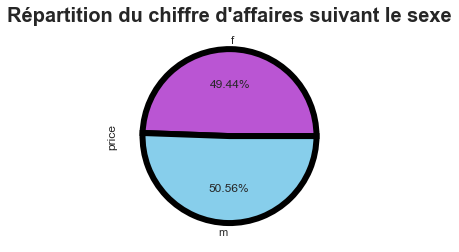

In [85]:
# Répartition suivant le sexe
sp=transac.groupby("sex").sum()[["price"]]
sp.price.plot.pie(colors= ['mediumorchid', 'skyblue'],
                  wedgeprops = { 'linewidth' : 6, 
                                'edgecolor' : 'black'},
                  autopct = lambda x: str(round(x, 2)) + '%')

plt.title("Répartition du chiffre d'affaires suivant le sexe",
          fontsize = 20, fontweight="bold");


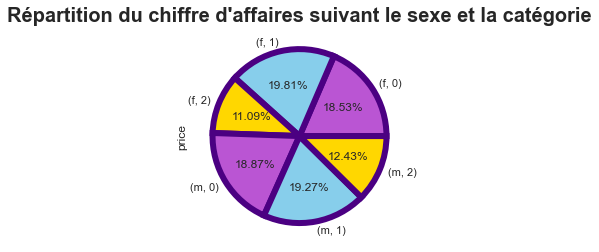

In [86]:
# Répartition suivant le sexe et la catégorie
sp=transac.groupby(["sex", "categ"]).sum()[["price"]]
sp.price.plot.pie(colors= ['mediumorchid', 'skyblue', 'gold'],
                  wedgeprops = { 'linewidth' : 6, 
                                'edgecolor' : 'indigo'},
                  autopct = lambda x: str(round(x, 2)) + '%')
#plt.legend(["Cat 0", "cat 1", "cat 2"], loc= 'lower left')
plt.title("Répartition du chiffre d'affaires suivant le sexe et la catégorie",
          fontsize = 20, fontweight="bold");


On constate qu'il y un équilibre au niveau de la répartition du chiffre d'affaires entre les hommes et les femmes. La catégorie n'est pas influencée également. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


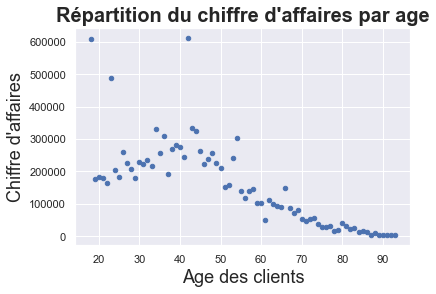

In [87]:
# Répartition par age 

transac.groupby("age").sum().reset_index().plot.scatter(x='age',
                                                        y='price');

plt.ylabel("Chiffre d'affaires", fontsize = 18)
plt.xlabel("Age des clients", fontsize = 18)
plt.title("Répartition du chiffre d'affaires par age", 
          fontsize = 20, fontweight="bold"); 


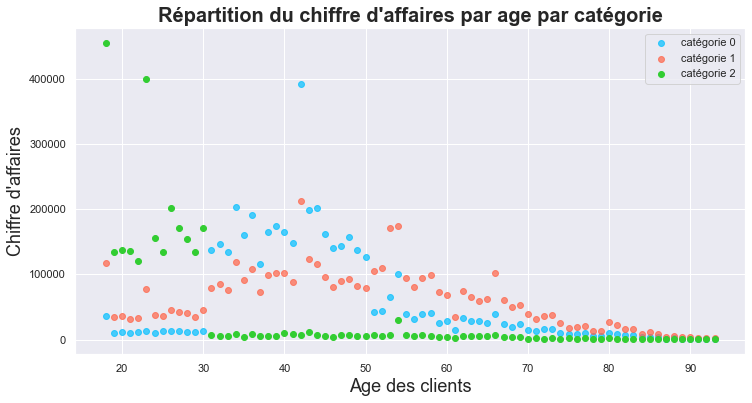

In [88]:
cata=transac.pivot_table(['price'],['categ','age'],
                         aggfunc='sum', margins=False).reset_index()

C0=cata[cata["categ"]==0][['age','price']]
C1=cata[cata["categ"]==1][['age','price']]
C2=cata[cata["categ"]==2][['age','price']]

plt.figure(figsize=(12,6))
plt.scatter(x=C0.age, y=C0.price, color='deepskyblue', alpha=0.7)
plt.scatter(x=C1.age, y=C1.price, color='tomato', alpha=0.7)
plt.scatter(x=C2.age, y=C2.price, color='limegreen')
plt.ylabel("Chiffre d'affaires", fontsize = 18)
plt.xlabel("Age des clients", fontsize = 18)
plt.legend(["catégorie 0", "catégorie 1", "catégorie 2"])

plt.title("Répartition du chiffre d'affaires par age par catégorie", 
          fontsize = 20, fontweight="bold"); 


On remarque 3 chiffres d'affaires hors norme à plus de 400 000€ sur des produits catégorie 2 et 0 à 18 ans, 23ans et 42 ans. On remarquera plus tard que le 23 et 42 ans concerne en réalité des profils professionnels. Il doit y avoir une limite d'âge pour l'inscription en ligne, ce qui explique la grosse majorité de vente à partir de 18 ans. Ce profil mélange surement les personnes qui ont moins de 18 ans, les personnes morales sans âge et les personnes ayant réellement 18 ans.
Le profils 18-30 ans se distingue par son chiffre d'affaires de la catégorie 2.
Le profils 30-50 lui se distingue pour la catégorie 0.

<a class="anchor" id="II.c.2.iii"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Panier Moyen</h2>

In [89]:
#Montant= Regrouper par session en additionnant les prix
panier= transac.groupby("session_id").agg({'price': lambda x: x.sum(),
                                   'client_id': lambda x: x.unique(), 
                                   'age': lambda x: x.unique(), 
                                   'sex': lambda x: x.unique()})

#Regrouper les sessions par client puis par age ou sexe.
panier= panier.groupby("client_id").agg({'price': lambda x: x.mean(),
                                   'age': lambda x: x.unique(),
                                   'sex': lambda x: x.unique()})


panierage= panier.groupby("age").agg({'price': lambda x: x.mean()}
                                    ).reset_index()

paniersex= panier.groupby("sex").agg({'price': lambda x: x.mean()}
                                    ).reset_index()


In [90]:
paniersex

,sex,price
0,f,40.133792
1,m,40.578352


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


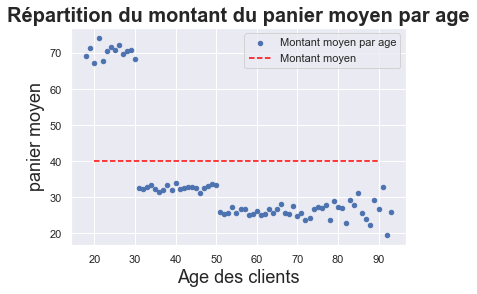

In [91]:

panierage.plot.scatter(x='age',y='price');

plt.ylabel("panier moyen", fontsize = 18)
plt.xlabel("Age des clients", fontsize = 18)
plt.hlines(y=40, xmin=20, xmax=90, color= "red", ls='--' )
plt.legend(["Montant moyen par age", "Montant moyen"])
plt.title("Répartition du montant du panier moyen par age", 
          fontsize = 20, fontweight="bold"); 

On constate que le prix du panier moyen tourne autour de 40€ sans distinction du sexe. On remarque également que le montant moyen du panier est plus élevé pour les clients entre 18 et 30ans puis baisse au fur et à mesure de l'age. 3 groupes distinct: 18-30,30-50 et 50+

In [92]:
#nombre= Regrouper par session en additionnant les prix
panier= transac.groupby("session_id").agg({'price': lambda x: x.count(),
                                   'client_id': lambda x: x.unique(), 
                                   'age': lambda x: x.unique(), 
                                   'sex': lambda x: x.unique()})

#Regrouper les sessions par client puis par age ou sexe.
panier= panier.groupby("client_id").agg({'price': lambda x: x.mean(),
                                   'age': lambda x: x.unique(),
                                   'sex': lambda x: x.unique()})


panierage= panier.groupby("age").agg({'price': lambda x: x.mean()}
                                    ).reset_index()

paniersex= panier.groupby("sex").agg({'price': lambda x: x.mean()}
                                    ).reset_index()



In [93]:
paniersex

,sex,price
0,f,1.967342
1,m,1.989173


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


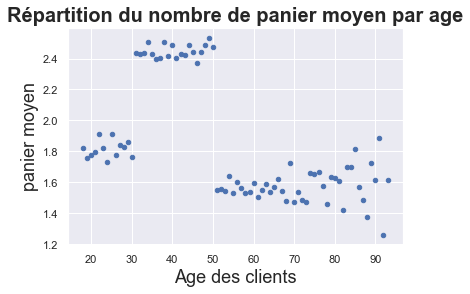

In [94]:
panierage.plot.scatter(x='age',y='price');

plt.ylabel("panier moyen", fontsize = 18)
plt.xlabel("Age des clients", fontsize = 18)
plt.title("Répartition du nombre de panier moyen par age", 
          fontsize = 20, fontweight="bold"); 

On constate que le nombre d'article moyen est quasiment à 2 articles par session d'achat. Ici, également, on distingues 3 groupes: les 18-30ans avec 1,8 articles en moyenne, les 30-50ans avec plus de 2,4 articles et les +de 50ans avec 1,6 articles en moyenne. 

<a class="anchor" id="II.c.2.iv"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Top client</h2>

In [95]:
# Client avec le plus gros chiffre d'affaires
transac.groupby("client_id").sum(
).sort_values(by=["price"], ascending=[False])[[ "price"]].head(10)

,price
client_id,
c_1609,323396.16
c_4958,289553.40
c_6714,153092.09
c_3454,113208.49
c_3263,5276.87
c_1570,5237.03
c_2899,5214.05
c_2140,5172.84
c_7319,5155.77


In [96]:
# Client avec le plus grand nombre de ventes
transac.groupby("client_id").count(
).sort_values(by=["price"], ascending=[False])[["price"]].head(10)



,price
client_id,
c_1609,25455
c_6714,9156
c_3454,6753
c_4958,5184
c_3263,403
c_2140,400
c_2595,397
c_2077,384
c_7421,379


On retrouve les mêmes clients aux quatre premières places de ces tops. 

In [97]:
client[client["client_id"]=="c_1609"]

,client_id,age,birth,sex
4591,c_1609,42,1980,m


In [98]:
client[client["client_id"]=="c_4958"]

,client_id,age,birth,sex
98021,c_4958,23,1999,m


In [99]:
client[client["client_id"]=="c_6714"]

,client_id,age,birth,sex
30427,c_6714,54,1968,f


In [100]:
client[client["client_id"]=="c_3454"]

,client_id,age,birth,sex
41056,c_3454,53,1969,m


Au vu de la volumétrie et du montant, on peut déduire que ces quatre clients sont des professionnels.

In [101]:
# stocker l'index des 4 clients professionnels.
hs= transac.groupby("client_id").count(
).sort_values(by=["price"], ascending=[False])[["price"]].head(4)

ref=hs.index

# filtrer pour garder que les transactions professionnelles.
clientpro= transac[transac.client_id.isin(ref)]

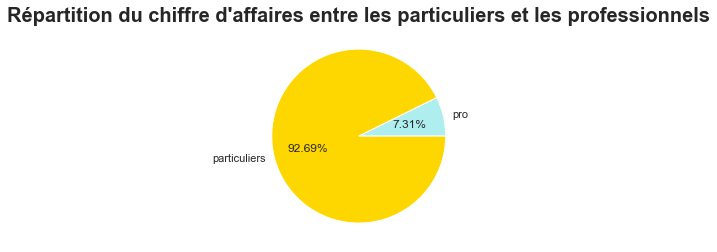

In [102]:
CAG=clientpro.sum()[['price']] # chiffre d'affaires pro
particulier=CA-CAG # chiffre d'affaires particulier.

CAcompare= pd.DataFrame([CAG.price, particulier.price], 
                        columns=['chiffre_affaires'], 
                        index=['pro','particuliers'])

CAcompare.chiffre_affaires.plot.pie(colors=['paleturquoise', 'gold'],
                                   autopct = lambda x: str(round(x, 2)
                                                          ) + '%',) # faire apparaître le pourcentage

plt.title("Répartition du chiffre d'affaires entre les particuliers et les professionnels", 
          fontsize = 20, fontweight="bold"); 
plt.ylabel("");


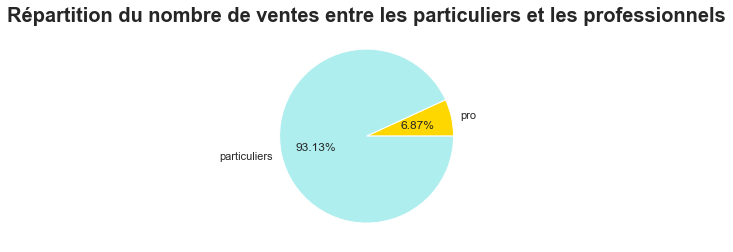

In [103]:
NbvP=clientpro.count()[['price']] # nombre de ventes pro
Nautre= len(transac)-NbvP # nombre ventes particuliers

NBcompare= pd.DataFrame([NbvP.price, Nautre.price], 
                        columns=['Nb_ventes'], 
                        index=['pro','particuliers'])

NBcompare.Nb_ventes.plot.pie(colors=['gold', 'paleturquoise'],
                             autopct = lambda x: str(round(x, 2)
                                                    ) + '%')

plt.title("Répartition du nombre de ventes entre les particuliers et les professionnels",
          fontsize = 20, fontweight="bold"); 
plt.ylabel("") ;


On constate que la vente avec 4 professionnels représente près de 6,8% du nombre de ventes en lignes et 7,3% du chiffre d'affaires.

<div style="background-color: #F5A9C6;">
    <a class="anchor" id="II.c.3"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#75515F;"> 3. Fréquence <a class="anchor" id="II.c.3"></a>

<a class="anchor" id="II.c.3.iI"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">Nombre de visites</h2>

In [104]:
transac.session_id.drop_duplicates().count()

341672

Le nombre total de visites aboutissant à un achat est de 341 672 visites depuis le lancement.

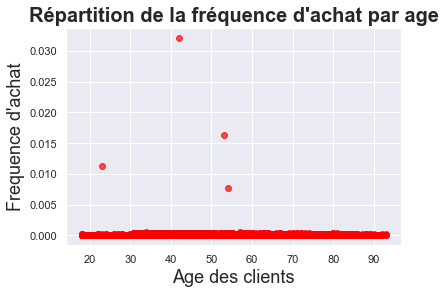

In [105]:
session= len(transac.session_id.unique())

freq2= transac.groupby("client_id").agg({'session_id': lambda x: x.nunique(),
                                   'age': lambda x: x.unique(), 
                                   'price': lambda x: x.mean(),
                                   'sex': lambda x: x.unique()})

freq2['freq']= freq2.session_id / session

freq2=freq2.reset_index()

plt.scatter(x=freq2.age, y=freq2.freq, color='red', alpha=0.7)
plt.ylabel("Frequence d'achat", fontsize = 18)
plt.xlabel("Age des clients", fontsize = 18)
plt.title("Répartition de la fréquence d'achat par age", 
          fontsize = 20, fontweight="bold"); 

On retrouve ici les 4 profils professionnels qui se distinguent du reste des clients.

In [106]:


transac["annee"] = transac["date"].map(lambda d: d.year)
transac["mois"] = transac["date"].map(lambda d: d.month_name())
transac["mois_num"] = transac["date"].map(lambda d: d.month)
transac["jour"] = transac["date"].map(lambda d: d.day)
transac["jour_sem"] = transac["date"].map(lambda d: d.day_name())
transac["jour_sem_num"] = transac["date"].map(lambda d: d.weekday()+1)
WEEKEND=transac[(transac['jour_sem']=='Saturday'
                ) | (transac['jour_sem']=='Sunday'
                    )][["jour_sem"]].drop_duplicates()
WEEKEND=WEEKEND.jour_sem
transac["weekend"] = transac["jour_sem"].isin(WEEKEND)
transac["quart_mois"] = [int((jour-1)*4/31)+1 for jour in transac["jour"]]
transac["heure"] = transac["date"].map(lambda d: d.hour)
transac["trimestre"] = transac["date"].map(lambda d: d.quarter)
transac["semaine"] = transac["date"].map(lambda d: d.week)

sessionUnique= transac.drop_duplicates('session_id')


par an

In [107]:
# Nombre de visites par année
sessionUnique.groupby("annee").count()[["client_id"]]

,client_id
annee,
2021,139239
2022,174601
2023,27832


In [108]:
clia= transac.pivot_table(["price"], 
                          ["client_id", "annee"], 
                          aggfunc='count', 
                          margins=True).reset_index()

clia.sort_values(by="price", ascending=False).head(10)


,client_id,annee,price
24186,All,,677666
1913,c_1609,2022,12757
1912,c_1609,2021,10747
17804,c_6714,2022,4674
17803,c_6714,2021,3720
7647,c_3454,2022,3561
12331,c_4958,2022,2723
7646,c_3454,2021,2625
12330,c_4958,2021,2050
1914,c_1609,2023,1951


par trimestre

In [109]:
# Nombre de visites par trimestre
sessionUnique.groupby("trimestre").count(
)[["client_id"]].sort_values(by=["client_id"],ascending=False)

,client_id
trimestre,
1,86173
3,85507
2,85402
4,84590


par mois

In [110]:
# Nombre de visites par mois
sessionUnique.groupby("mois").count(
)[["client_id"]].sort_values(by=["client_id"],ascending=False)

,client_id
mois,
December,30195
January,29733
May,29124
September,29111
March,29029
November,28832
June,28225
July,28219
August,28177


Par semaine

In [111]:
# Nombre de visites par semaine
sessionUnique.groupby("quart_mois").count(
)[["client_id"]].sort_values(by=["client_id"],ascending=False)

,client_id
quart_mois,
1,90037
3,89901
2,89695
4,72039


Par jour

In [112]:
# Nombre de visites par jour de la semaine
sessionUnique.groupby("jour_sem").count(
)[["client_id"]].sort_values(by=["client_id"],ascending=False)

,client_id
jour_sem,
Tuesday,49314
Monday,49293
Sunday,48940
Wednesday,48688
Thursday,48680
Friday,48461
Saturday,48296


<a class="anchor" id="II.c.3.IIi"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF"> CLTV</h2>

Custom life time value.

Afin de déterminer la valeur des clients sur le site internet, j'ai calculé sa valeur client grâce à la formule suivante: ((Moyenne des commandes* Fréquence d'achat) / le taux d'attrition) * par le profit.

In [113]:
# Regrouper pour chaque client pour chacune de ses sessions pour le nombre de produits vendu et son montant.
CAClient= transac.groupby('client_id').agg({'session_id': lambda x: x.nunique(),
                                            'id_prod': lambda x: x.count(),
                                            'price': lambda x: x.sum()})
CAClient.columns= ['total_sessions', 'total_achat', "CAtotal"]#Modifier le nom des colonnes


# Calcul du montant moyen des commandes par client
CAClient["moyenne_vente"]= CAClient['CAtotal']/CAClient['total_sessions']
# Calcul de la Fréquence d'achat
CAClient["frequence_vente"]= CAClient['total_sessions']/ CAClient.shape[0]
# Calcul du taux de non rachateur ou attrition
Racheteur= CAClient[CAClient.total_sessions > 1].shape[0] / CAClient.shape[0]
nonRacheteur= 1- Racheteur
#Calcul du profit basé sur 10% du chiffre d’affaires
CAClient['profit']= CAClient['CAtotal']* 0.10  


# formule de calcul CLTV
CAClient['Valeur_client']= (CAClient[
    'moyenne_vente']* CAClient['frequence_vente']) / nonRacheteur

CAClient['CLTV']= CAClient['Valeur_client']* CAClient['profit']


# Mettre à l'echelle avec la méthode sklearn
trie= MinMaxScaler(feature_range=(0,1)) # mettre à l'echelle entre 0 et 1
trie.fit(CAClient[["CLTV"]])  #Calcul le minimum et le maximum à utiliser pour mettre ensuite à l'echelle
CAClient["Trie_CLTV"]= trie.transform(CAClient[["CLTV"]]) #mettre à l'echelle les données. 
CAClient.sort_values(by=["Trie_CLTV"], ascending= False)

#Segmenter en 4 niveaux 
CAClient["segment"]= pd.qcut(CAClient["Trie_CLTV"], 
                             4, labels= ["D", "C", "B ",'A'])

CAClient[["total_sessions",'total_achat', "CLTV", 'Trie_CLTV'
         ]].sort_values(by=["Trie_CLTV"], ascending= False).head(10)


,total_sessions,total_achat,CLTV,Trie_CLTV
client_id,,,,
c_1609,10988,25455,3.486169e+08,1.000000
c_4958,3845,5184,2.794706e+08,0.801655
c_6714,2618,9156,7.812396e+07,0.224097
c_3454,5560,6753,4.272054e+07,0.122543
c_3263,143,403,9.281786e+04,0.000266
c_1570,157,367,9.142161e+04,0.000262
c_2899,69,105,9.062106e+04,0.000260
c_2140,147,400,8.919425e+04,0.000256
c_7319,145,371,8.860655e+04,0.000254


In [114]:
# Regrouper par segment pour distinguer les différents niveaux de 
CAClient.groupby('segment')[['total_sessions',
                             'total_achat',
                             'CAtotal',
                             'CLTV',
                             'Trie_CLTV'
 ]].agg({'count', 'mean', 'sum'})


total_sessions                    total_achat                      \
                 count     sum       mean       count     sum        mean   
segment                                                                     
D                 2150   24425  11.360465        2150   42291   19.670233   
C                 2150   50339  23.413488        2150   96982   45.107907   
B                 2150   85416  39.728372        2150  162620   75.637209   
A                 2150  181492  84.414884        2150  375773  174.778140   

        CAtotal                           CLTV                               \
          count         sum         mean count           sum           mean   
segment                                                                       
D          2150   689030.28   320.479200  2150  8.720348e+05     405.597566   
C          2150  1665402.69   774.605902  2150  4.434656e+06    2062.630631   
B          2150  2926604.94  1361.211600  2150  1.360382e+07    6327.358462   
A          2150  6541136.24  3042.388949  2150  8.024680e+08  373240.918563   

        Trie_CLTV                      
            count       sum      mean  
segment                                
D            2150  0.002501  0.000001  
C            2150  0.012720  0.000006  
B            2150  0.039021  0.000018  
A            2150  2.301861  0.001071

<a class="anchor" id="II.c.3.iv"></a>
<h2 style="text-align: center;text-decoration:bold;color:#736767;background-color:#F2DAEF">scoring RFM </h2>

In [115]:
Recent= dt.datetime(2023,2,28) # dernière date d'achat. 
#transac['Dates']= pd.to_datetime(transac['Dates'])

# calcule des différents paramètres
RFMClient= transac.groupby('client_id').agg({
    'Dates': lambda x: (Recent - x.max()).days,  #recence
    'session_id': lambda x: x.nunique(),  #Frequency
    'price': lambda x: x.sum(),}) #Monetary

#renommer les colonnes
RFMClient.columns=['recency','frequency','monetary']

# Diviser en 4 niveau les valeurs
RFMClient['R'] = pd.qcut(RFMClient['recency'], q=4, labels=['1','2','3','4'])
RFMClient['F'] = pd.qcut(RFMClient['frequency'], q=4, labels=['4','3','2','1'])
RFMClient['M'] = pd.qcut(RFMClient['monetary'], q=4, labels=['4','3','2','1'])

# fusionner les 3 notes en une R+F+M
RFMClient['RFM_Score'] = RFMClient.R.astype(str)+ RFMClient.F.astype(str) + RFMClient.M.astype(str)


# les meilleurs clients ont obtenue 1 en note.
RFMClient[RFMClient['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()


,recency,frequency,monetary,R,F,M,RFM_Score
client_id,,,,,,,
c_1609,0,10988,323396.16,1,1,1,111
c_4958,0,3845,289553.40,1,1,1,111
c_6714,0,2618,153092.09,1,1,1,111
c_3454,0,5560,113208.49,1,1,1,111
c_3263,2,143,5276.87,1,1,1,111


On retrouve nos 4 gros clients professionnels

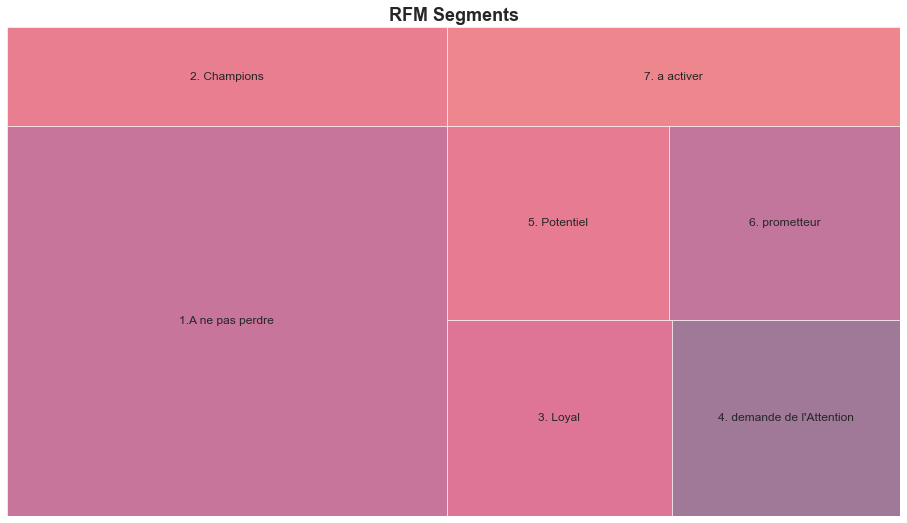

In [116]:
RFMClient["R"]=pd.to_numeric(RFMClient["R"])
RFMClient["F"]=pd.to_numeric(RFMClient["F"])
RFMClient["M"]=pd.to_numeric(RFMClient["M"])

# additionner les scores pour chaque client
RFMClient['RFM_Score_total'] = RFMClient[['R','F','M']].sum(axis=1)

#Rajouter une mention pour chaque score
def RFM_niveau(tab):
    if tab['RFM_Score_total'] >= 9:
        return 'A ne pas perdre'
    elif ((tab['RFM_Score_total'] >= 8) and (
        tab['RFM_Score_total'] < 9)):
        return 'Champions'
    elif ((tab['RFM_Score_total'] >= 7) and (
        tab['RFM_Score_total'] < 8)):
        return 'Loyal'
    elif ((tab['RFM_Score_total'] >= 6) and (
        tab['RFM_Score_total'] < 7)):
        return 'Potentiel'
    elif ((tab['RFM_Score_total'] >= 5) and (
        tab['RFM_Score_total'] < 6)):
        return 'prometteur'
    elif ((tab['RFM_Score_total'] >= 4) and (
        tab['RFM_Score_total'] < 5)):
        return 'demande de l\'Attention'
    else:
        return 'a activer'
RFMClient['RFM_niveau'] = RFMClient.apply(RFM_niveau, axis=1)


#Regrouper par mention.
RFMClientMention = RFMClient.groupby('RFM_niveau').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1)
RFMClientMention.columns = ['R_Moyenne','F_Moyenne','M_Moyenne',
                            'Somme']
# Création d'un graphique montrant la proportion de chaque Mention;
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=RFMClientMention['Somme'], 
              label=['1.A ne pas perdre',
                     '2. Champions',
                     '3. Loyal',
                     '4. demande de l\'Attention',
                     '5. Potentiel', 
                     '6. prometteur', 
                     '7. a activer'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

On remarque qu'on a  une forte proportions de clients avec un bon score de fidélité.

# III. Les corrélations sur les clients  <a class="anchor" id="III"></a>

<div style="background-color: #309EFC;">
    <a class="anchor" id="III.a"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#1F5482;">a) Préparation </h2>
</div>

<div style="background-color: #37C3E6;">
    <a class="anchor" id="III.a.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#994D06;"> 1. Nettoyage  </h2>
</div>

j'ai supprimé les 4 profils professionnels pour normaliser l'échantillon et axer l'analyse sur seulement les profils particuliers.

In [117]:
transacpar= transac[~transac.client_id.isin(ref)]

J'ai supprimé l'âge de 18 ans car elle n'est pas fiable sur les analyse pour âge. Comme vu plus haut, cet âge a dû être choisi par défaut étant la première proposé. Si je laisse cet âge, je risque de fausser l'analyse basée sur la répartition par âge.


In [118]:
transacn=transacpar[transacpar["age"]>18]

<div style="background-color: #37C3E6;">
    <a class="anchor" id="III.a.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#994D06;"> 2. Création des formules d'analyses  </h2>
</div>

In [119]:
#ANOVA pour analyser corrélation entre donnée qualitative et quantitative

def eta_squared(x,y):
    # moyenne de la donnée numérique
    moyenne_y= y.mean() 
    
    # moyenne liée à la donnée qualitative=classe et son nombre d'apparition
    classes= []
    for classe in X.unique():
        yi_classe= y[x==classe]
        classes.append({'ni':len(yi_classe),
                       'moyenne_classe': yi_classe.mean()})
        
    # variation totale      (donnée qtt - Moyenne)^2
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    
    # variation interclasse (nombre apparition de la classe * (moyenne donnée qtt lié classe - moyenne total))^2
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    
    #Variation intraclasse
    SCR = SCT - SCE
    
    # calcul ANOVA          Variation interclasse SCE / Variation totale SCT
    nANOVA= SCE/SCT
    
    return (f'le Rapport de corrélation est {nANOVA}, \
    Variation inter{SCE}, Variation Totale {SCT}, Variation intra{SCR}' )


In [120]:
#CHI 2 pour analyser corrélation entre deux données qualitatives;

def chi2(x, y, Tab):
    # Création tableau contingence croisant les 2 données qualitatives pour comptabiliser leur occurrence.
    cont = Tab[[X,Y]].pivot_table(index=X,
                                  columns=Y,
                                  aggfunc=len,
                                  margins=True,
                                  margins_name="Total")

    # Nombre total de chaque donnée x et son total
    tx = cont.loc[:,["Total"]]
    # Nombre total de chaque donnée y et son total
    ty = cont.loc[["Total"],:]
    # nombre Total d'occurrences
    n = len(Tab)
    # Tableau d'indépendance, ce qu'on attend= Produit matriciel entre tx et tx / nombre total d'occurrence
    indep = tx.dot(ty) / n
    print("la table théorique est", indep)
    
    # (pour chaque donnée - son indépendance)^2 / son indépendance pour normaliser
    measure = (cont-indep)**2/indep

    # somme de toutes les mesures de chaque occurrence. Plus elle est grande moins indépendante.
    xi_n = measure.sum().sum()
    print("la valeur de khi 2 est : {}".format(round(xi_n,2)))
    
    # Normaliser entre 0 et 1 en divisant par le chi 2. en 
    table = (measure/xi_n)*100
    print("la table des différences est:", table)
   
    # Graphique en heatmap pour distinguer les sources de dépendances
    sns.heatmap(table.iloc[:-1,:-1],annot=cont.iloc[:-1,:-1], fmt="d")
    plt.title("Différence Chi2 entre Table contingence et Table théorique",fontsize = 20, fontweight="bold")
    return()


In [121]:
#Régression pour analyser corrélation entre deux données quantitatives; 
# voir explication Régression dans la section prévision du Chiffre d'affaires II.2.iv

def regression(x, y, param, predic,formul, table, absi, ordo, titre, couleur):
    # Création d'une copie de x
    x=x.copy()  
    # Création d'une colonne remplie de 1.0
    x['intercept']= 1.
    
    # Calcul du moindre carrés ordinaire avec statsmodels.formula.api
    model= ols(formula=formul, data=table)
    result= model.fit()
    
    # Extraction des résultats pour l'estimation de a et b 
    a,b = result.params[1], result.params[0]
    prévision= (a*predic)+b
    

    plt.scatter(X, Y, c='violet')
    plt.plot(X, result.predict(X), "-r", color=couleur, linewidth=4)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.xlabel(absi, fontsize = 18)
    plt.ylabel(ordo, fontsize = 18)
    plt.title(titre, fontsize = 20, fontweight="bold");
    return(f'a= slope ou coef{a} et b= intercept {b}, prédiction={prévision}')


<div style="background-color: #37C3E6;">
    <a class="anchor" id="III.a.3"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#994D06;"> 3. Création d'une formule de catégorie  </h2>
</div>

In [122]:
def category_age(age):
    if age < 30:
        return ' 19-29 ans'
    elif (age >= 30) & (age < 41):
        return '30-40 ans'
    elif (age >=41 ) & (age < 52):
        return '41-51 ans'
    elif (age >=52 ) & (age < 63):
        return '52-62 ans'
    elif (age >=63 ) & (age < 74):
        return '63-73 ans'
    else:
        return 'plus de 73 ans'

In [123]:
transacnage= transacn.copy()
transacnage['age']= pd.to_numeric(transacnage['age'])
transacnage['age'] = transacnage['age'].map(category_age)

<div style="background-color: #309EFC;">
    <a class="anchor" id="III.b"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#1F5482;">b) Corrélation sur le genre par rapport à la catégorie </h2>
</div>

Cette vérification nécessite d'analyser deux variables Qualitatives avec le genre H/F et Catégorie 0, 1, 2.

<div style="background-color: #37C3E6;">
    <a class="anchor" id="III.b.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#994D06;"> 1. Préparation de la table pour analyse  </h2>
</div>

Il est nécessaire de créer une table de contingence pour pouvoir analyser leur corrélation et appliquer le test chi2 qui est l'un des plus adapté à cette situation. J’y ai inclus les données pour la tranche d’âge de 18 ans car elle n’impacte la distribution de la catégorie sexe.
Je n'ai pas regroupé par client car chaque client peut acheter plusieurs catégories différentes. J'ai donc regroupé directement pour chaque sexe, le nombre total de ventes par catégorie grâce à un tableau dynamique.

In [124]:
# création de la table de contingence

categosex=transacpar.pivot_table(index= 'sex', 
                                 columns='categ', 
                                 values= 'price', 
                                 aggfunc= len, margins=False)
transacpar.pivot_table(index= 'sex',
                       columns='categ', 
                       values= 'price', 
                       aggfunc= len, margins=True)

categ,0,1,2,All
sex,,,,
f,200904.0,110550.0,16980.0,328434.0
m,186589.0,100227.0,15868.0,302684.0
All,387493.0,210777.0,32848.0,631118.0


<div style="background-color: #37C3E6;">
    <a class="anchor" id="III.b.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#994D06;"> 2. Analyse de Corrélation Chi2 </h2>
</div>

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.b.2.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Méthode chi-2 </h2>
</div>

la table théorique est categ              0             1             2     Total
sex                                                       
f      201651.475575  109688.41519  17094.109235  328434.0
m      185841.524425  101088.58481  15753.890765  302684.0
Total  387493.000000  210777.00000  32848.000000  631118.0
la valeur de khi 2 est : 21.48
la table des différences est: categ          0          1         2  Total
sex                                         
f      12.901262  31.511923  3.546784    0.0
m      13.998802  34.192712  3.848517    0.0
Total   0.000000   0.000000  0.000000    0.0


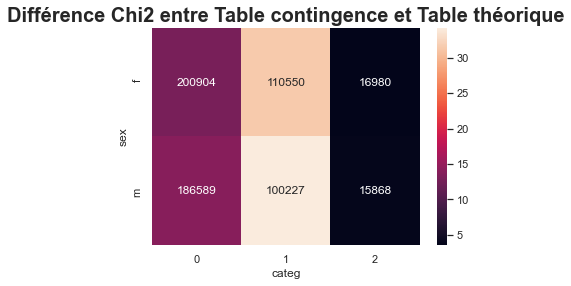

In [125]:
#Chi2
X= "sex"
Y= "categ"

chi2(X,Y,transacpar);


La valeur du Chi2 est de 21,48.

La heat map représente la différence entre la table de contingence attendu si il n'y avait pas corrélation avec la réalité qui a ensuite été normalisé. 

Plus sa différence est importante plus elle est représentée en claire ce qui signifie qu'elles sont non indépendantes. 
Et inversement, plus la différence attendu est proche de celle de la réalité, plus elle est foncée. 

Ici, la heat map est assez peu visuelle concernant la dépendance entre le sexe et la catégorie. En effet les valeurs paraissent assez proche entre le sexe féminin et masculin. 
La Heat Map nous indique que le choix du livre ne dépendrait pas sexe mais plutôt de sa catégorie. Donc cela signifie que peu importe le sexe, on aurait plus de chance d'acheter un livre de Catégorie 0 que de catégorie 2 par exemple.
On distingue un léger degré de dépendance plus forte qui favorise le sexe masculin car il tend à être légèrement plus claire que le sexe féminin et ses valeurs de la table de contingence des différences sont plus importante. 

<div style="background-color: #37C3E6;">
    <a class="anchor" id="III.b.3"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#994D06;"> 3. Vérifier l'applicabilité du test chi2  </h2>
</div>

Afin de vérifier si l'échantillon est bien significatif pour conclure cette dépendance entre les 2 variables et non aléatoire, nous devons appliquer le test Chi2.
Le test d'indépendance du chi2 permet de vérifier si des Variables sont dépendantes ou indépendantes. 

Les mesures sont bien indépendantes entre elles et il n'y a pas d'effectifs théoriques inférieurs à 5 dans les cases du tableau de contingence. Nous rentrons bien dans le cas d'un test paramétrique.

H0= Pas de corrélation entre le sexe et la catégorie acheté

H1= Corrélation linéaire statistiquement significatif

<h2 style= "text-decoration:bold"> Etape 1: Déterminer le degré de liberté.  </h2


Degré de liberté= (nb ligne-1)  * (nb colonnes -1)

In [126]:
DDL= (2-1)*(3-1)
DDL

2

<h2 style= "text-decoration:bold"> Etape 2: Choisir le seuil d'erreur:  </h2

Probabilité d'erreur à 5%, 1% et 0,1%
Avec donc un rejet avec une p_value à 0.05, 0.01, et 0.001

<h2 style= "text-decoration:bold"> Etape 3: Déterminer le chi2 critique suivant la table du chi2  </h2

Valeur critique du Khi2 pour un degré de liberté de 2 = 
   * 5,991 pour 5%
   * 9,210 pour 1%
   * 13,816 pour 0,1%

![table_chi2](loi_du_chi2.png)

21,48 > 13,816


On Constate que le chi2 calculé est significativement supérieur au chi2 critique supposé avec le seuil d'erreur le plus bas à 0,001. On rejette donc l'hypothèse nulle et valide l'hypothèse 1. 

Au vu de ce test, il y aurait donc une potentielle Corrélation/dépendance statistiquement significative entre le sexe et la catégorie de produit acheté. 


In [127]:
chi2, p_val, dof, expect = chi2_contingency(categosex)
print("la valeur chi2=",chi2)
print("la p_valeur=", p_val)
print("la valeur dof=", dof)
print("table théorique est= ", expect)

la valeur chi2= 21.47634620378189
la p_valeur= 2.1700546749821838e-05
la valeur dof= 2
table théorique est=  [[201651.47557509 109688.41519019  17094.10923472]
 [185841.52442491 101088.58480981  15753.89076528]]


Cette fonction Scipy qui utilise le tableau de contingence confirme bien le test du chi2. On retrouve le même chi2 et le même degré de liberté. 

La p_value est d'ailleurs largement inférieur à 0,01% ce qui signifie que la marge d'erreur est encore plus faible. 

<div style="background-color: #309EFC;">
    <a class="anchor" id="III.c"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#1F5482;">c) Corrélation entre l'âge et le montant</h2>
</div>

Cette vérification peut être fait de deux manière différentes.
* Soit en analysant deux variables Quantitatives avec la variable du montant et de l'âge. 
* Soit en analysant une variable quantitative du Montant avec une variable qualitative avec le regroupement par catégorie d'âge. 

Lors de l'analyse sur des variables Quantitatives, il est plutôt conseillé de l'appliquer sur des variables continues. Hors, notre variable âge est une variable discrète car elle a un nombre de valeurs limité. Je vais tout de même appliqué le test sur cette variable afin de tester cette technique.

<div style="background-color: #37C3E6;">
    <a class="anchor" id="III.c.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#994D06;"> 1. Préparation de la table pour analyse  </h2>
</div>

Afin d'analyser les montants de chaque client, il est nécessaire de créer un tableau qui va centraliser ces informations. Pour ce faire, j'ai créé un tableau qui additionne les prix des vente pour chaque client.

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.c.1.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> TABLE VERSION VARIABLES QUANTITATIVES </h2>
</div>

In [128]:
#Montant= transacn.groupby("session_id").agg({'client_id': lambda x: x.unique(),'price': lambda x: x.sum(),'age': lambda x: x.unique()}).reset_index()
#Montants= transacn.groupby("client_id").agg({'age': lambda x: x.unique(),'price': lambda x: x.mean()}).reset_index()

In [129]:
Montants= transacn.groupby("client_id").agg({'age': lambda x: x.unique(),
                                             'price': lambda x: x.sum(), 
                                             'id_prod': lambda x: x.count()})


<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.c.1.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> TEST DE NORMALITE VARIABLES QUANTITATIVES </h2>
</div>

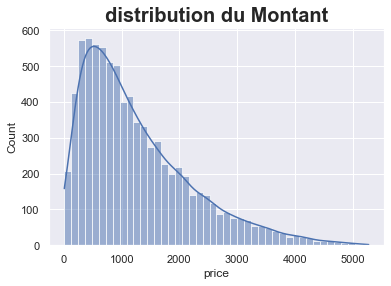

In [130]:
sns.histplot(data= Montants, x='price', kde=True)
plt.title("distribution du Montant", 
          fontsize = 20, fontweight="bold"); 

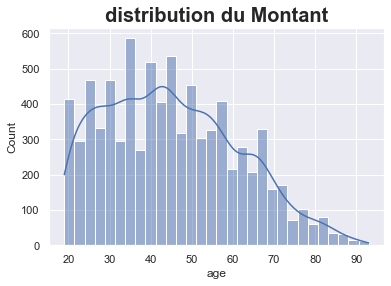

In [131]:
sns.histplot(data= Montants, x='age', kde=True)
plt.title("distribution du Montant", 
          fontsize = 20, fontweight="bold"); 

Au vu de la distribution de l'histogramme, notre échantillon n'a pas du tout une forme de distribution Normale sur les 2 variables.

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.c.1.3"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> TABLE VERSION VARIABLES QUANTITATIVE/ QUALITATIVE</h2>
</div>


In [132]:
# Version âge en donnée qualitative
Montantc= transacnage.groupby("client_id").agg({'age': lambda x: x.unique(), 
                                   'price': lambda x: x.sum(), 'id_prod': lambda x: x.count()})

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.c.1.4"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> TEST DE NORMALITE VARIABLES QUANTITATIVE/ QUALITATIVES </h2>
</div>

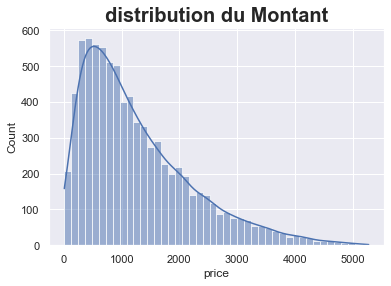

In [133]:
sns.histplot(data= Montantc, x='price', kde=True)
plt.title("distribution du Montant", 
          fontsize = 20, fontweight="bold"); 

La distribution n'est pas normalisée.

Le diagramme Quantile Quantile ou Q-Q permet d'évaluer visuellement la pertinence de l'ajustement d'une distribution à partir d'un modèle théorique, la droite rouge. Si les quantiles calculés suivent bien la distribution théorique, ils seront alors très proche de la droite théorique. Précédemment, la courbe ne suit pas une distribution normaliser mais plutôt une distribution asymétrique vers la gauche.
Pour pouvoir visualiser un exemple de distribution non paramétrique, je l'ai tout de même testé.

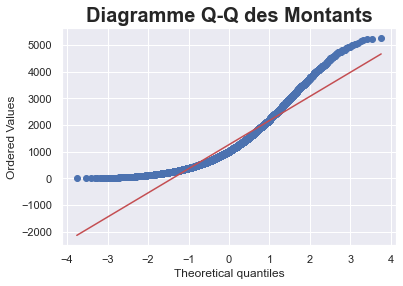

In [134]:
sps.probplot(Montantc.price, dist="norm", plot=plt);
plt.title("Diagramme Q-Q des Montants", 
          fontsize = 20, fontweight="bold"); 

Au vu de la distribution de l'histogramme et du Q-Q, notre échantillon n'a pas une forme de distribution Normale. Il y a une forte concentration au niveau du premier prix. Pour Pouvoir m'entrainer, j'ai également fait un Test de Normalité pour apprivoiser cette méthode.

Il existe différents tests pour déterminer la normalité de la distribution de l'échantillon qui sont: 
* Le test de Shapiro Wilk n<50 ou 5000
* Le test de Jarque-Bera (basé asymétrie et la Kurtose et la N)
* Le test de Kolmogorov-Smirnov (non paramétrique pour grand échantillon)
* Le test de Anderson-Darling (à partir distribution normale)

Je vais tester celui de Kolmogorov-Smirnov car la taille de l'échantillon est important.

## TEST DE KOLMOGOROV SMIRNOV

Ce test mesure les écarts maximum entre la répartition observée en bleu et répartition théorique d'une distribution normale en vert. 

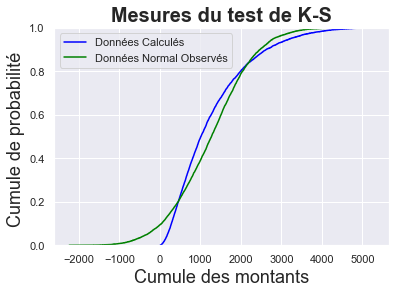

In [135]:
# Création d'une table normé à partir des données de bases
data_norm = np.random.normal(np.mean(Montantc['price']), 
                             np.std(Montantc['price']), 
                             len(Montantc))
# Trier et catégoriser les prix
# Calculer la somme cumulée de chaque table
# Tracer les courbes
sns.ecdfplot(Montantc['price'], c='blue')
sns.ecdfplot(data_norm, c='green')
plt.legend(["Données Calculés","Données Normal Observés"])
plt.ylabel("Cumule de probabilité ", fontsize = 18)
plt.xlabel("Cumule des montants", fontsize = 18)

plt.title("Mesures du test de K-S", 
          fontsize = 20, fontweight="bold"); 


In [136]:
result = (kstest(Montantc['price'], cdf='norm'))

print(f"K-S statistic: {result[0]}")
print(f"p-value: {result[1]}")

K-S statistic: 0.9999999998604823
p-value: 0.0


Le Test de KOLMOGOROV SMIRNOV permet également de confirmer le rejet de cette normalité. 

H0= La distribution suit une loi Normale

H1= La distribution ne suit pas une loi Normale

<h2 style= "text-decoration:bold"> Etape 1: Déterminer la taille de l'échantillon N  </h2

n= 8159 (taille de l'échantillon)
    
<h2 style= "text-decoration:bold"> Etape 2: Choisir le seuil d'erreur </h2

Probabilité d'erreur à 1%
Avec donc un rejet avec une p_value à 0.01

<h2 style= "text-decoration:bold"> Etape 3: Déterminer le D critique suivant la table de la loi de KOLMOGOROV SMIRNOV </h2
      
Le D Critique pour un Risque à 5% est de 0,0150    (1,358/ racine(N)
    
Le D Critique pour un Risque à 1% est de 0,0180    (1,629/ racine(N)

![table_KS](Loi_KS.png)
    
<h2 style= "text-decoration:bold"> Etape 4: Calculer le D calculé </h2
      
Le D statistics calculé est de 0.99 

D > D Critique Donc on rejette l'hypothèse Nulle de la normalité.
    
La P_Value est 0.0 plus petit que 0.05. On rejette donc bien l'Hypothèse nulle de normalité.     

La distribution du prix suit donc une distribution non gaussienne.

<div style="background-color: #37C3E6;">
    <a class="anchor" id="III.c.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#994D06;"> 2. Analyse de Corrélation Quantitatives  </h2>
</div>

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.c.2.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Méthode Covariance </h2>
</div>

Cette méthode calcule les variables par rapport à leur moyenne multiplier entre eux. 

(x- moyenne x)(y- moyenne y) avec x le paramètre de l'âge et y le paramètre du prix.

In [137]:
np.cov(Montants['age'], Montants['price'], ddof=0)[1][0]

-3047.000878964578

-3047 est difficile à interpréter car on compare des prix à des âges.
Vu qu'il est négatif, les deux facteurs semblent évoluer dans le sens opposé.

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.c.2.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Méthode Pearson ou Spearman </h2>
</div>

La corrélation de Pearson calcule le Ratio entre la covariance et les écarts types de x et y qui équivaut à l'âge* et au prix. 

Mais cette méthode qui permet de calculer la corrélation entre deux variables est efficace seulement sur des échantillons suivant une distribution normale. 
Si cette échantillon ne le suit pas, ce calcul nous permettra seulement de connaitre la tendance linéaire entre les 2 variables. 

Pour connaitre leur niveau de corrélation, il faudra alors appliquer plutôt la corrélation de Spearman. 

Le Pearson étudie la relation linéaire entre les 2 variables alors que celui de Spearman étudie la relation Monotone entre les 2 variables. Donc il va mesurer à quel point une variable va augmenter si l'autre variable augmente.

Concernant l'échantillon des Montants, on a pu constater qu'il ne suit pas une distribution Normale. Je vais donc appliquer la corrélation de Spearman.

\* La variable doit être de préférence une variable quantitative continue. Ce qui n'est pas le cas ici comme vu plus haut

In [138]:
sps.pearsonr(Montants.price, Montants.age)[0]

-0.19698216870669052

Il y a donc une faible Corrélation linéaire car le résultat est proche de 0.

In [139]:
cores=sps.spearmanr(Montants.price, Montants.age)
print(cores)
cores= cores[0]

SpearmanrResult(correlation=-0.19225593353989823, pvalue=8.912061054894383e-69)


Le Coefficient de corrélation est R= -0,19. 

Il est négatif et proche de -0, ce qui confirme qu'il y a bien une faible corrélation dans le sens négatif. 

J'ai ensuite mis au carré la corrélation pour pouvoir le passer en positif.

In [140]:
coef=cores**2
coef

0.03696234398129777

Le coefficient de détermination R^2 = 3% 

Ce Coefficient de détermination  indique que 3 % des variations du prix s'expliquerait par l'age.

Au vu de la régression vu dans le calcul suivant, on a pu constater que le jeu de donnée n'est pas linéaire. On distingue 2 groupes, ceux des moins de 50 ans et ceux des plus de 50ans. J'ai donc également calculé le coefficient de détermination de Spearman pour chacun des deux groupes.

In [141]:
Montantjeune= Montants[Montants["age"]< 50]

coeff=sps.spearmanr(Montantjeune.price, Montantjeune.age)
print(coeff)
coeff= coeff[0]**2
coeff

SpearmanrResult(correlation=0.07652993710873678, pvalue=5.1303660602500635e-08)


0.0058568312738672065

In [142]:
Montantage= Montants[Montants["age"]>= 50]

coeff=sps.spearmanr(Montantage.price, Montantage.age)
print(coeff)
coeff= coeff[0]**2
coeff

SpearmanrResult(correlation=-0.06832685917625285, pvalue=0.0001384732396591003)


0.004668559684891488

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.c.2.3"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Méthode Régression </h2>
</div>

'a= slope ou coef-11.547712694631336 et b= intercept 1787.696145011361, prédiction=1268.0490737529508'

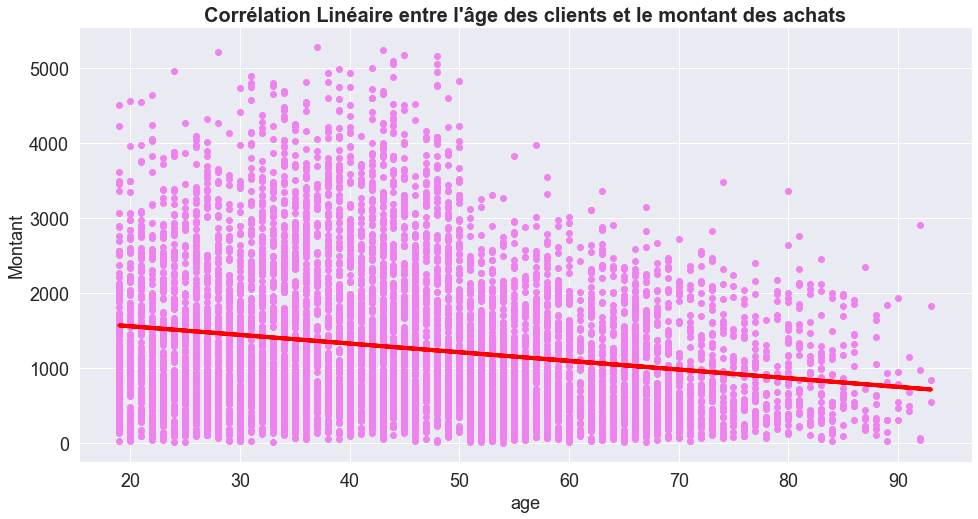

In [143]:
#Régression    ax + b + c 
plt.figure(figsize=(16,8))

Y= Montants['price']    
X= Montants[['age']]  
absi= "age"
ordo= "Montant"
titre= "Corrélation Linéaire entre l'âge des clients et le montant des achats"

regression(X, Y, 'age', 45,'price ~ age',Montants, absi, ordo, titre, "red")

Modéliser= 
Par exemple le montant probable pour une personne de 45 ans serait de 1 268€ expliquer à hauteur de 3 % des variations du prix qui s'expliquerait par l’âge.

Suivant la configuration, elle n'est pas linéaire. Le modèle plus complexe. Il pourrait être intéressant d'appliquer plutôt une Regression Polynomiale pour ce cas afin d'avoir des résultats plus précis. A la place, j'ai également tenté de faire une regression linéaire sur les deux groupes distincts des - de 50 ans et des plus de 50 ans.

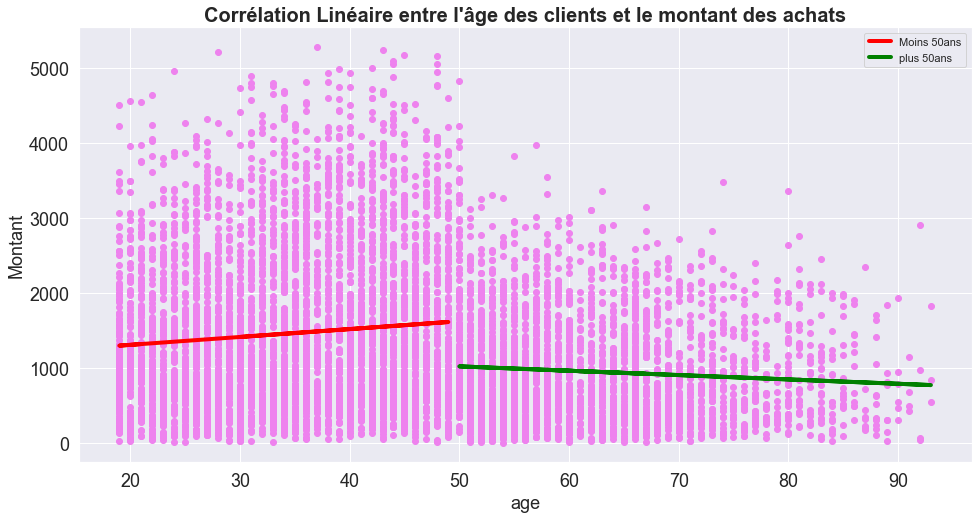

In [144]:
#Régression    ax + b + c 
plt.figure(figsize=(16,8))

Y= Montantjeune['price']    
X= Montantjeune[['age']]  
absi= "age"
ordo= "Montant"
titre= "Corrélation Linéaire entre l'âge des clients et le montant des achats"

R1=regression(X, Y, 'age', 42,'price ~ age',Montantjeune, absi, ordo, titre, "red")
Y= Montantage['price']    
X= Montantage[['age']]  

r2=regression(X, Y, 'age', 53,'price ~ age',Montantage, absi, ordo, titre, "green")
plt.legend(["Moins 50ans", "plus 50ans"])

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.c.2.4"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Test Significatif de la Corrélation. </h2>
</div>

Pour pouvoir vérifier si la corrélation est statistiquement significatif, il est nécessaire de mettre en place un test adapté aux variables analysées. Étant donné que nous analysons deux variables quantitatives, 2 tests peuvent être utilisé pour le tester: 
* Le test de Student qui suit un test paramétrique (indépendantes, variances égales, +20 individus suivant une loi normale) compare la moyenne des 2 groupes avec l'écart de la moyenne.
* Le test de Wilcoxon-Mann-Whitney qui suit un test non paramétrique compare les mesures de l'écart de position des couples entre 2 Variables.

L'échantillon actuel ne suit pas une distribution Normale. Le test de Student ne serait donc pas adapté pour notre analyse. Mais j'ai tout de même souhaité le tester. 

### TEST DE STUDENT
H0= Pas de corrélation entre l'age et le montant

H1= Corrélation linéaire statistiquement significatif

<h2 style= "text-decoration:bold"> Etape 1: Déterminer le degré de liberté </h2

degré de liberté = Nb d'individu de l'échantillon - 2
    
n= 8159 - 2 = 8157

In [145]:
#Degré de liberté.
n= len(Montants)-2
n

8157

<h2 style= "text-decoration:bold"> Etape 2: Choisir le seuil d'erreur </h2

Probabilité d'erreur = 
* 0.05% seuil de confiance de 95%
Avec donc un rejet avec une p_value à 0.05 
* 0.0001% Seuil de confiance de 99,9999%
    
    
<h2 style= "text-decoration:bold"> Etape 3: Déterminer le T critique suivant la table de la loi de STUDENT </h2
    
Table centré réduite Table de Student  +120 individu avec P à 0,05
* T Critique 0.05%  = 1,96
* T Critique 0.0001% = 3.891
    
![table_Student](Loi_de_student.png)  
    
   
<h2 style= "text-decoration:bold"> Etape 4: Calculer le T calculé </h2
    
T calculé =  r * racine de (n-2 / 1 - R^2 ) 

In [146]:
# T calculé
import math as m
cores*(m.sqrt((n-2)/(1- coef)))

-17.691721754408356

On constate que le T calculé  est bien plus grand que le  T critique avec un seuil de confiance à 99,9999% soit moins 1 chance sur dix mille de se tromper.

Nous rejetons donc bien l'hypothèse nulle qui indique qu'il n'y a pas de corrélation entre le Montant et l'âge.


J'ai également testé avec la librairie Stats Model d'appliquer la loi de student. 

In [147]:
model= ols(formula='price ~age', data= Montants)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     329.3
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           3.57e-72
Time:                        17:01:40   Log-Likelihood:                -67377.
No. Observations:                8159   AIC:                         1.348e+05
Df Residuals:                    8157   BIC:                         1.348e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1787.6961     30.516     58.582      0.000    1727.877    1847.515
age          -11.5477      0.636    -18.146      0.000     -12.795     -10.300
==============================================================================
Omnibus:                     1318.627   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2100.730
Skew:                           1.118   Prob(JB):                         0.00
Kurtosis:                       4.085   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No Obsevration= Taille de l'échantillon 8159

Df Residuals= Degré de liberté

Df Model= Nombre de variables différentes influant le prix= 1 l'âge.

R-squared =R au carré= Corrélation de pearson de 0.039

Intercept Coef = Valeur b de ax+b de la regression = 1787.6961

age Coef = Valeur de a de ax+b de la régression = -11.5477

T = T calculé = -18.146

P>|t|= p_value = 0.000

Omnibus et Jarque-Bera(JB) sont deux tests pour tester la normalité de l'échantillon avec sa P_value. 

Cette fonction confirme bien le test de Student. On retrouve quasiment la même valeur de T à -18 avec le même degré de liberté. La p_value est d'ailleurs largement inférieur à 0,0001%.

Ce test Rejette donc bien l'indépendance entre ces 2 facteurs ce qui rend significatif le R au carré peu élevé confirmant bien une potentielle faible corrélation entre les variables. 

Cependant, comme nous avons pu voir l'échantillon ne suit pas une distribution Normale. Donc cette affirmation ne peut être concluante. 

Je vais donc appliquer le test le plus adapté pour ce type d'échantillon, le test de Wilcoxon-Mann-Whitney.
Le test de Wilcoxon Mesure l'écart de position entre 2 Variables qui somme les rangs de chaque Variable (W).
Le test de Mann Whitney Mesure l'écart entre les échantillons qui somme les nombres de couples.(U) 

In [148]:
# Test de U Mann Whitney
sps.mannwhitneyu(x=Montants["price"], 
                 y=Montants["age"], 
                 alternative='two-sided')

MannwhitneyuResult(statistic=66229617.0, pvalue=0.0)

Wilcoxon

In [149]:
ranksums(Montants.price, Montants.age)

RanksumsResult(statistic=109.49546210337179, pvalue=0.0)

Dans les 2 applications de test, on constate que la P_value est largement plus petite que 0.05. Donc l'hypothèse de H0 est bien rejetée ici également. 

<div style="background-color: #37C3E6;">
    <a class="anchor" id="III.c.3"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#994D06;">  3. Analyse de Corrélation ANOVA   </h2>
</div>

La variable Quantitative de l'âge étant une variable discrète et donc pas adapté pour une analyse de Corrélation, j'ai préféré également faire une analyse avec cette même variable en version qualitative transformé en classes d'âges.

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.c.3.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Méthode ANOVA </h2>
</div>

L'ANOVA ou "analyse de la variance", analyse comme son nom l'indique la variance entre les différents groupes(inter groupe) et au sein de chaque groupe(intra groupe). 
On peut également mesurer l'intensité de la relation entre les 2 variables en divisant la variation intra groupe par la variation totale de l'échantillon. 

In [150]:
#ANOVA
X= Montantc.age
Y= Montantc.price
eta_squared(Montantc.age, Montantc.price)

'le Rapport de corrélation est 0.07440779623643078,     Variation inter550516190.1936326, Variation Totale 7398635869.343144, Variation intra6848119679.149511'

La variation moyenne est plus importante au sein des différentes catégories (intragroupe) que entre elle (intergroupe). Donc la corrélation est Faible car proche de 0. Seul 7% de la variabilité serait  expliqué par la catégorie, ici l'âge.


<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.c.3.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Test de Corrélation </h2>
</div>

Pour pouvoir vérifier si la corrélation est statistiquement significatif, il est nécessaire de mettre en place un test adapté aux variables analysées. Étant donné que nous analysons une variable quantitative et Qualitative, 3 tests peuvent être utilisés pour le tester:
* Le test de student si la variable qualitative n’a pas plus de deux valeurs qui est paramétrique
* Le test d'ANOVA Fisher si la variable qualitative a plus de 2 valeurs  qui suit un test paramétrique (indépendantes, variances égales, +20 individus suivant une loi normale pour chaque groupe)
* Le test de KRUSKAL-WALLIS qui suit un test non paramétrique.

L'échantillon actuel possède une variable qualitative avec 6 groupes mais ne suit pas une distribution Normale. Le test de Fisher ne serait donc pas adapté pour notre analyse. Mais j'ai tout de même souhaité le tester.

H0= Pas de corrélation entre l'age et le Montant.

H1= Corrélation linéaire statistiquement significatif

## TEST DE FISHER

<h2 style= "text-decoration:bold"> Etape 1: Déterminer le degré de liberté.  </h2


Degré de liberté= 
    
    DDL inter Numérateur= nb de groupes-1  = 6-1 = 5
    
    DDL intra Dénominateur= nb d'observations -nb groupes = 8159-6 = 8153
        
ddl(5, 8153)
     

    
<h2 style= "text-decoration:bold"> Etape 2: Choisir le seuil d'erreur </h2

Probabilité d'erreur à 5%
Avec donc un rejet avec une p_value à 0.05

<h2 style= "text-decoration:bold"> Etape 3: Déterminer le F critique suivant la table de la loi de Fisher </h2

Valeur critique de F pour un degré de liberté de F(5, 8153)= 
    
    * 2.237

![table_Fisher](loi_fisher.png)  
   
<h2 style= "text-decoration:bold"> Etape 4: Calculer le F calculé </h2
    
    F= Variance entre les groupes inter / Variance dans les groupes intra

In [151]:
#F variance inter normalisé / variance intra normalié
F= (550516190.1936326/5 ) / (6848119679.149511/ 8153)
F

131.08294565337124

Rejet H0 car F > 2.237 

Échantillon est très significatif car le F calculé est supérieur au F critique.

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ 

In [152]:
mod = ols('price ~ age', data=Montantc).fit()
aov_table= sm.stats.anova_lm(mod, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
age,5.0,5.505162e+08,1.101032e+08,131.082946,5.143586e-134
Residual,8153.0,6.848120e+09,8.399509e+05,NaN,NaN


Categ= Variation intergroupe		

Residual= Variation intragroupe

df= degré de liberté = 5 et 8153.0

sum_sq= somme des carrés

mean_sq= Moyenne des Carrés. = somme carré / degré de liberté

F = F stat = Carré Moyen Inter / Carré Moyen Intra = 131.082946

PR(>F)= P_value = 5.143586e-134


F calculé 131.082946 > F critique 2.627

Cette fonction confirme bien le test de Fisher. On retrouve la même valeur de F et le même degré de liberté. La p_value est d'ailleurs largement inférieur à 0,01%.

Ce test Rejette donc bien l'indépendance entre ces 2 facteurs. Malgré la faible corrélation calculé avec l'ANOVA, il y aurait bien une potentielle influence qui génère cette dépendance. 

Cependant, comme nous avons pu voir l'échantillon ne suit pas une distribution Normale. Donc cette conclusion ne peut être Valide. Je vais donc appliquer le test le plus adapté pour ce type d'échantillon, le test de KRUSKAL-WALLIS. 

## TEST DE KRUSKAL-WALLIS

<h2 style= "text-decoration:bold"> Etape 1: Déterminer le degré de liberté et le K et autres.  </h2

    K= Nombre de groupes = 6
    DDL inter Numérateur= nb de groupes-1  = 6-1 = 5
    N= Taille échantillon total = 8159
    N1= Taille de l'échantillon +1 = 8160
    Rbarre= (N * N1)/2
    Total0= 1643
    Total1= 1836
    Total2= 1876
    Total4= 1432
    Total5= 964
    Total6= 408
    
<h2 style= "text-decoration:bold"> Etape 2: Choisir le seuil d'erreur </h2

Probabilité d'erreur à 5%
Avec donc un rejet avec une p_value à 0.05

<h2 style= "text-decoration:bold"> Etape 3: Déterminer le H critique suivant la table de la loi du chi-2 </h2

Valeur critique de K =6 et des Samples Sizes à 6+= 
    
    * 12.592 pour P_value 5%
    * 22.458  Pour P_value 0,1%

![table_chi2](loi_du_chi2.png)
   
<h2 style= "text-decoration:bold"> Etape 4: Calculer le H calculé </h2
    
basé sur le rang de chaque couple de groupe. 
    exemple= rang 1 pour l'age avec la taille de l'échantillon le plus bas du groupe.
    
    (N-1) ((Total0*(Mediangroupe1  - Rbarre)**2)  idem groupe2+ groupe3) / (rangcouple1 - rbarre)**2 + idem rangcouple2 etc..)

In [153]:
kruskal(data= Montantc, dv='price', between='age')

,Source,ddof1,H,p-unc
Kruskal,age,5,552.754591,3.249660e-117


la H calculé 552.754591 > H critique 22.458. 

On constate également que la P_value Unilatérale < 0.005 donc on rejette bien l'Hypothèse 0.

Il y a possiblement une corrélation entre l'âge du client et le Montant dépensé. 

<div style="background-color: #309EFC;">
    <a class="anchor" id="III.d"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#1F5482;">d) Corrélation entre l'âge et la fréquence d'achat</h2>
</div>

Cette vérification peut être fait de deux manière différentes.

* Soit en analysant deux variables Quantitatives avec la variable de la fréquence et de l'âge. 
* Soit en analysant une variable quantitative de la fréquence avec une variable qualitative avec le regroupement par catégorie d'âge.

L'âge étant une variable discrète, il n'est pas pertinent d'appliquer un test en version quantitatif.
Je vais plutôt me concentrer sur l'analyse avec l'age en catégorie.

<div style="background-color: #37C3E6;">
    <a class="anchor" id="III.d.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#994D06;"> 1. Préparation de la table pour analyse  </h2>
</div>

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.d.1.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> TABLE VERSION VARIABLES QUANTITATIVE/QUALITATIVE </h2>
</div>

Afin d'analyser la fréquence d’achat annuelle de chaque client, il est nécessaire de créer un tableau qui va centraliser ces informations. Pour ce faire, j'ai créé un tableau qui compte regroupe tous les achats par session id pour avoir toutes séances d’achats différentes. Puis j’ai compté le nombre de session id présents pour chaque client chaque année. 

In [154]:
# Valeurs qualitatives
# je regroupe par client en additionnant le prix des ventes puis j'ai calculé sa fréquence

freq1= transacnage.groupby("session_id").agg(
    {'client_id': lambda x: x.unique(),
     'annee': "first", 
     'age': lambda x: x.unique()}).reset_index()

freq2= freq1.pivot_table(index= ['client_id', "age"],
                         columns= 'annee', 
                         values= 'session_id',
                         aggfunc= 'nunique', 
                         margins=False).reset_index()

freq2["Moyenne"]= freq2.mean(axis=1)

freq2=freq2.fillna(0.0)
freq2

annee,client_id,age,2021,2022,2023,Moyenne
0,c_1,63-73 ans,14.0,18.0,1.0,11.000000
1,c_10,63-73 ans,16.0,15.0,3.0,11.333333
2,c_100,30-40 ans,3.0,2.0,0.0,2.500000
3,c_1000,52-62 ans,32.0,55.0,5.0,30.666667
4,c_1001,30-40 ans,20.0,22.0,5.0,15.666667
...,...,...,...,...,...,...
8154,c_995,63-73 ans,5.0,4.0,0.0,4.500000
8155,c_996,52-62 ans,32.0,42.0,5.0,26.333333
8156,c_997,19-29 ans,9.0,13.0,2.0,8.000000
8157,c_998,19-29 ans,10.0,11.0,2.0,7.666667


<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.d.1.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Test de Normalité des Variables Quantitative/ Qualitative </h2>
</div>

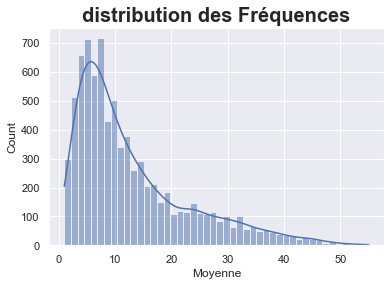

In [155]:
sns.histplot(data= freq2, x='Moyenne', kde=True)
plt.title("distribution des Fréquences", fontsize = 20, fontweight="bold");


Le diagramme Quantile Quantile ou Q-Q permet d'évaluer visuellement la pertinence de l'ajustement d'une distribution à partir d'un modèle théorique, la droite rouge. Si les quantiles calculés suivent bien la distribution théorique, ils seront alors très proche de la droite théorique. Précédemment, la courbe ne suit pas une distribution normaliser mais plutôt une distribution asymétrique vers la gauche. 
Pour pouvoir visualiser un exemple de distribution non paramétrique, je l'ai tout de même testé.

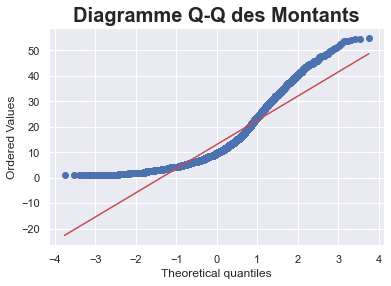

In [156]:
sps.probplot(freq2.Moyenne, dist="norm", plot=plt);
plt.title("Diagramme Q-Q des Montants", fontsize= 20, fontweight="bold");


Au vu de la distribution de l'histogramme et du Q-Q, notre échantillon n'a pas une forme de distribution Normale. Il y a une forte concentration au niveau des extrémités qui concernent des fréquences d'achats élevées et peu élevées.

<div style="background-color: #37C3E6;">
    <a class="anchor" id="III.d.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#994D06;"> 2. Analyse de Corrélation ANOVA  </h2>
</div>

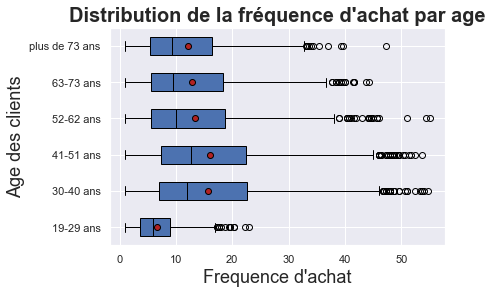

In [157]:
Modalites= freq2.age.drop_duplicates().sort_values()
groupes = []
for m in Modalites:
    groupes.append(freq2[freq2["age"]==m]["Moyenne"])
Medianpropos = {'color' :'black'}
Meanprops= {'marker' : 'o', 'markeredgecolor' : 'black', 'markerfacecolor' : 'firebrick'}
plt.boxplot(groupes,labels=Modalites, showfliers=True, medianprops= Medianpropos, vert = False, patch_artist= True, showmeans= True, meanprops=  Meanprops);
title_name = "Distribution de la fréquence d'achat par age"
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.xlabel("Frequence d'achat", fontsize = 18)
plt.ylabel("Age des clients", fontsize = 18)
plt.title(title_name, fontsize = 20, fontweight="bold");



<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.d.2.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Méthode ANOVA </h2>
</div>

L'ANOVA ou "analyse de la variance", analyse comme son nom l'indique la variance entre les différents groupes(inter groupe) et au sein de chaque groupe(intra groupe). On peut également mesurer l'intensité de la relation entre les 2 variables en divisant la variation intra groupe par la variation totale de l'échantillon.

In [158]:
#ANOVA
X= freq2.age
Y= freq2.Moyenne

eta_squared(freq2.age, freq2.Moyenne)

'le Rapport de corrélation est 0.11297931465166203,     Variation inter96327.31409594395, Variation Totale 852610.1826067936, Variation intra756282.8685108497'

La variation moyenne est plus importante au sein des différentes catégories d'âges (intragroupe) que entre elle (intergroupe). Donc la corrélation est Faible car proche de 0. Seul 11% de la variabilité est expliqué par la différence d'âge.

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.d.2.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Test de Fisher </h2>
</div>

Pour pouvoir vérifier si la corrélation est statistiquement significatif, il est nécessaire de mettre en place un test adapté aux variables analysées. Étant donné que nous analysons une variable quantitative et Qualitative, 3 tests peuvent être utilisé pour le tester:

*  	Le test de student si la variable qualitative n’a pas plus de deux valeurs qui est paramétrique
*	Le test d'ANOVA Fisher si la variable qualitative a plus de 2 valeurs qui suit un test paramétrique (indépendantes, variances égales, +20 individus suivant une loi normale pour chaque groupe)

*	Le test de KRUSKAL-WALLIS qui suit un test non paramétrique.

L'échantillon actuel possède une variable qualitative avec 6 groupes mais ne suit pas une distribution Normale. Le test de Fisher ne serait donc pas adapté pour notre analyse. Mais j'ai tout de même souhaité le tester.


### TEST DE FISHER
H0= Pas de corrélation entre l’âge et la fréquence

H1= Corrélation linéaire statistiquement significatif

#### Étape 1: Déterminer le degré de liberté. ddl(5, 8153)
• Degré de liberté=DDL inter Numérateur= nb de groupes-1  = 6-1 = 5
• DDL intra Dénominateur= nb d'observations -nb groupes = 8159-6 = 8153

#### Étape 2: Choisir le seuil d'erreur 
Probabilité d'erreur à 5% Avec donc un rejet avec une p_value à 0.05

#### Etape 3: Déterminer le F critique suivant la table de la loi de Fisher 
Valeur critique de F pour un degré de liberté de F(5, 8153)= 2,237

#### Etape 4: Calculer le F calculé 
F= Variance entre les groupes inter / Variance dans les groupes intra

In [159]:
mod = ols('Moyenne ~ age', data=freq2).fit()
aov_table= sm.stats.anova_lm(mod, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
age,5.0,96327.314096,19265.462819,207.688584,4.213756e-209
Residual,8153.0,756282.868511,92.761299,NaN,NaN


age= Variation intergroupe	

Residual= Variation intragroupe

df= degré de liberté = 5 et 8153.0			

sum_sq= somme des carrés

mean_sq= Moyenne des Carrés. = somme carré / degré de liberté

F = F stat = Carré Moyen Inter / Carré Moyen Intra = 207.688584

PR(>F)= P_value = 4.213756e-209

F calculé 207.688584 > F critique  2,237

Cette fonction confirme bien le test de Fisher. On retrouve la même valeur de F et le même degré de liberté. 

La p_value est d'ailleurs largement inférieur à 0,01%. Ce test Rejette donc bien l'indépendance entre ces 2 facteurs. Malgré la faible corrélation calculé avec l'ANOVA, il y a bien une potentielle influence qui génère cette dépendance. 

Cependant, comme nous avons pu voir l'échantillon ne suit pas une distribution Normale. Donc cette conclusion ne peut être Valide. Je vais donc appliquer le test le plus adapté pour ce type d'échantillon, le test de KRUSKAL-WALLIS.


## TEST DE KRUSKAL-WALLIS

<h2 style= "text-decoration:bold"> Etape 1: Déterminer le degré de liberté et le K et autres.  </h2

    K= Nombre de groupes = 6
    DDL inter Numérateur= nb de groupes-1  = 6-1 = 5
    N= Taille échantillon total = 8159
    N1= Taille de l'échantillon +1 = 8160
    Rbarre= (N * N1)/2
    Total0= 1643
    Total1= 1836
    Total2= 1876
    Total4= 1432
    Total5= 964
    Total6= 408
    
<h2 style= "text-decoration:bold"> Etape 2: Choisir le seuil d'erreur </h2

Probabilité d'erreur à 5%
Avec donc un rejet avec une p_value à 0.05

<h2 style= "text-decoration:bold"> Etape 3: Déterminer le H critique suivant la table de la loi du Khi2 </h2

Valeur critique de K =6 et des Samples Sizes à 6+= 
    
    * 12.592 pour P_value 5%
    * 22.458 Pour P_value 0.1%

   
<h2 style= "text-decoration:bold"> Etape 4: Calculer le H calculé </h2
    
basé sur le rang de chaque couple de groupe. 
    exemple= rang 1 pour l'age avec la taille de l'échantillon le plus bas du groupe.
    
    (N-1) ((Total0*(Mediangroupe1  - Rbarre)**2)  idem groupe2+ groupe3) / (rangcouple1 - rbarre)**2 + idem rangcouple2 etc..)

In [160]:
kruskal(data= freq2, dv='Moyenne', between='age')

,Source,ddof1,H,p-unc
Kruskal,age,5,1048.327857,2.066831e-224


la H calculé 1048.327857 > H critique 22.458. 

On constate également que la P_value Unilatérale < 0.005 donc on rejette bien l'Hypothèse 0.

Il y a bien une probable corrélation entre l'âge du client et la fréquence  achetée. 

<div style="background-color: #309EFC;">
    <a class="anchor" id="III.e"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#1F5482;">e) Corrélation entre l'âge et la taille du panier moyen</h2>
</div>

Cette vérification peut être fait de deux manière différentes.
* Soit en analysant deux variables Quantitatives avec la variable taille du panier et de l'âge. 
* Soit en analysant une variable quantitative de la taille du panier avec une variable qualitative avec le regroupement par catégorie d'âge.

L'âge étant une variable discrète, il n'est pas pertinent d'appliquer un test en version quantitatif.
Je vais plutôt me concentrer sur l'analyse avec l'age en catégorie.

<div style="background-color: #37C3E6;">
    <a class="anchor" id="III.e.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#994D06;"> 1. Préparation de la table pour analyse  </h2>
</div>

Afin d'analyser la taille du panier moyen d’achat de chaque client, il est nécessaire de créer un tableau qui va centraliser ces informations. Pour ce faire, j'ai créé un tableau qui comptabilise le nombre de produits achetés  par session id pour avoir le nombre d'articles lors de toutes séances d’achats différentes. Puis j’ai calculé la moyenne du nombre d'articles achetés pour chaque client.

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.e.1.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> TABLE VERSION VARIABLES QUANTITATIVE/QUALITATIVE </h2>
</div>

In [161]:
#qlt
# je regroupe par session en comptant le nombre de ventes puis par client et enfin j'affine par âge.
panier2= transacnage.groupby("session_id").agg({'price': lambda x: x.count(),
                                   'client_id': lambda x: x.unique(), 
                                   'age': lambda x: x.unique()})
panier2= panier2.groupby("client_id").agg({'price': lambda x: x.mean(),
                                   'age': lambda x: x.unique()}).reset_index()
panier2= panier2.rename(columns={'price': 'nbvente'})


panier2.groupby("age").agg({'nbvente': lambda x: x.mean()}).reset_index()


,age,nbvente
0,19-29 ans,1.820735
1,30-40 ans,2.377629
2,41-51 ans,2.371044
3,52-62 ans,1.562665
4,63-73 ans,1.561846
5,plus de 73 ans,1.611460


<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.e.1.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Test de Normalité des Variables Quantitative/ Qualitative </h2>
</div>

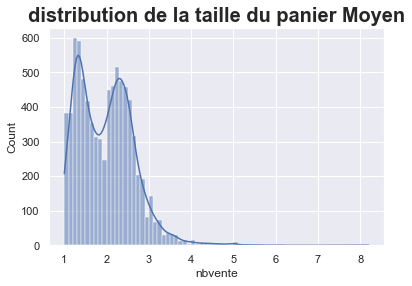

In [162]:
sns.histplot(data= panier2, x='nbvente', kde=True)
plt.title("distribution de la taille du panier Moyen", fontsize = 20, fontweight="bold");


Le diagramme Quantile Quantile ou Q-Q permet d'évaluer visuellement la pertinence de l'ajustement d'une distribution à partir d'un modèle théorique, la droite rouge. Si les quantiles calculés suivent bien la distribution théorique, ils seront alors très proche de la droite théorique. Précédemment, la courbe ne suit pas une distribution normaliser mais plutôt une distribution asymétrique vers la gauche. 
Pour pouvoir visualiser un exemple de distribution non paramétrique, je l'ai tout de même testé.


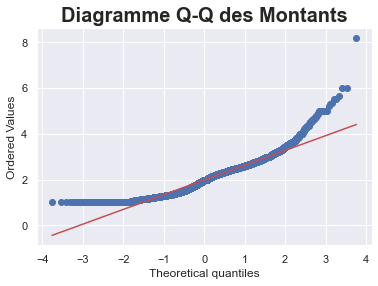

In [163]:
sps.probplot(panier2.nbvente, dist="norm", plot=plt);
plt.title("Diagramme Q-Q des Montants", fontsize= 20, fontweight="bold");


Au vu de la distribution de l'histogramme et du Q-Q, notre échantillon n'a pas une forme de distribution Normale. Il y a une forte concentration au niveau du plus faible nombres de ventes. Pour Pouvoir m'entrainer, j'ai également fait un Test de Normalité pour apprivoiser cette méthode.

Il existe différents tests pour déterminer la normalité de la distribution de l'échantillon qui sont:

* Le test de Shapiro Wilk n<50 ou 5000
* Le test de Jarque-Bera (basé asymétrie et la Kurtose et la N)
* Le test de Kolmogorov-Smirnov (non paramétrique pour grand échantillon)
* Le test de Anderson-Darling (à partir distribution normale)

Je vais tester celui de Kolmogorov-Smirnovcar la taille de l'échantillon est important.


## TEST DE KOLMOGOROV SMIRNOV

Ce test mesure les écarts maximum entre la répartition observée en bleu et répartition théorique d'une distribution normale en vert. 

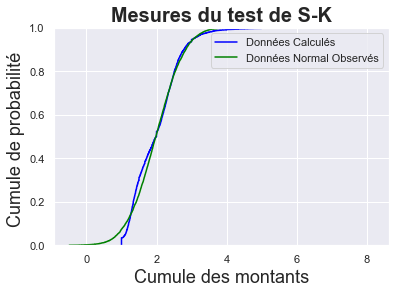

In [164]:
# Création d'une table normé à partir des données de bases
data_norm = np.random.normal(np.mean(panier2['nbvente']), 
                             np.std(panier2['nbvente']), 
                             len(panier2))
# Trier et catégoriser les prix
# Calculer la somme cumulée de chaque table
# Tracer les courbes
sns.ecdfplot(panier2['nbvente'], c='blue')
sns.ecdfplot(data_norm, c='green')
plt.legend(["Données Calculés","Données Normal Observés"])
plt.ylabel("Cumule de probabilité ", fontsize = 18)
plt.xlabel("Cumule des montants", fontsize = 18)

plt.title("Mesures du test de S-K", 
          fontsize = 20, fontweight="bold"); 


In [165]:
result = (kstest(panier2['nbvente'], cdf='norm'))

print(f"K-S statistic: {result[0]}")
print(f"p-value: {result[1]}")

K-S statistic: 0.8413447460685429
p-value: 0.0


In [166]:
import math as m
1.358/ m.sqrt(len(panier2))

0.015034233925582424

Le Test de KOLMOGOROV SMIRNOV permet également de confirmer le rejet de cette normalité. 

H0= La distribution suit une loi Normale

H1= La distribution ne suit pas une loi Normale

<h2 style= "text-decoration:bold"> Etape 1: Déterminer la taille de l'échantillon N  </h2

n= 8159 (taille de l'échantillon)
    
<h2 style= "text-decoration:bold"> Etape 2: Choisir le seuil d'erreur </h2

Probabilité d'erreur à 5%
Avec donc un rejet avec une p_value à 0.05

<h2 style= "text-decoration:bold"> Etape 3: Déterminer le D critique suivant la table de la loi de KOLMOGOROV SMIRNOV </h2
        
    
Le D Critique pour un Risque à 5% est de 0,0150    (1,358/ racine(N)
    
Le D Critique pour un Risque à 1% est de 0,0180    (1,629/ racine(N)

<h2 style= "text-decoration:bold"> Etape 4: Calculer le D calculé </h2
      
Le D statistics calculé est de 0.8413447460685429. 

D > D Critique Donc on rejette l'hypothèse Nulle de la normalité.
    
La P_Value est 0.0 plus petit que 0.05. On rejette donc bien l'Hypothèse nulle de normalité.     

<div style="background-color: #37C3E6;">
    <a class="anchor" id="III.e.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#994D06;"> 2. Analyse de Corrélation ANOVA  </h2>
</div>

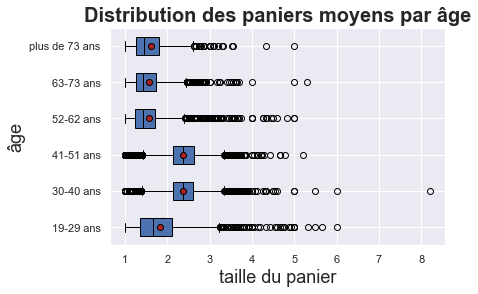

In [167]:
Modalites= panier2.age.drop_duplicates().sort_values()
groupes = []
for m in Modalites:
    groupes.append(panier2[panier2["age"]==m]["nbvente"])
Medianpropos = {'color' :'black'}
Meanprops= {'marker' : 'o', 'markeredgecolor' : 'black', 'markerfacecolor' : 'firebrick'}
plt.boxplot(groupes,labels=Modalites, showfliers=True, medianprops= Medianpropos, vert = False, patch_artist= True, showmeans= True, meanprops=  Meanprops);
title_name = "Distribution des paniers moyens par âge"
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.xlabel("taille du panier", fontsize = 18)
plt.ylabel("âge", fontsize = 18)
plt.title(title_name, fontsize = 20, fontweight="bold");

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.e.2.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Méthode ANOVA </h2>
</div>

L'ANOVA ou "analyse de la variance", analyse comme son nom l'indique la variance entre les différents groupes(inter groupe) et au sein de chaque groupe(intra groupe). On peut également mesurer l'intensité de la relation entre les 2 variables en divisant la variation intra groupe par la variation totale de l'échantillon.

In [168]:
#ANOVA
X= panier2.age
Y= panier2.nbvente

eta_squared(panier2.age, panier2.nbvente)

'le Rapport de corrélation est 0.3043964266656135,     Variation inter1091.8982122150494, Variation Totale 3587.092740134314, Variation intra2495.194527919265'

La variation moyenne est plus importante au sein des différentes catégories d'âges (intragroupe) que entre elle (intergroupe). Donc la corrélation est moyenne. Seul 30% de la variabilité est expliqué par la taille du panier.

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.e.2.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Test de Fisher </h2>
</div>

Pour pouvoir vérifier si la corrélation est statistiquement significatif, il est nécessaire de mettre en place un test adapté aux variables analysées. Étant donné que nous analysons une variable quantitative et Qualitative, 3 tests peuvent être utilisé pour le tester:

* Le test de student si la variable qualitative n’a pas plus de deux valeurs qui est paramétrique
* Le test d'ANOVA Fisher si la variable qualitative a plus de 2 valeurs qui suit un test paramétrique (indépendantes, variances égales, +20 individus suivant une loi normale pour chaque groupe)

* Le test de KRUSKAL-WALLIS qui suit un test non paramétrique.

L'échantillon actuel possède une variable qualitative avec 6 groupes mais ne suit pas une distribution Normale. Le test de Fisher ne serait donc pas adapté pour notre analyse. Mais j'ai tout de même souhaité le tester.

H0= Pas de corrélation entre l'age et la taille du panier

H1= Corrélation linéaire statistiquement significatif

## TEST DE FISHER

<h2 style= "text-decoration:bold"> Etape 1: Déterminer le degré de liberté.  </h2


Degré de liberté= 
    
    DDL inter Numérateur= nb de groupes-1  = 6-1 = 5
    
    DDL intra Dénominateur= nb d'observations -nb groupes = 8159-6 = 8153
        
ddl(5, 8153)
     

    
<h2 style= "text-decoration:bold"> Etape 2: Choisir le seuil d'erreur </h2

Probabilité d'erreur à 5%
Avec donc un rejet avec une p_value à 0.05

<h2 style= "text-decoration:bold"> Etape 3: Déterminer le F critique suivant la table de la loi de Fisher </h2

Valeur critique de F pour un degré de liberté de F(5, 8153)= 2,237
   
<h2 style= "text-decoration:bold"> Etape 4: Calculer le F calculé </h2
    
    F= Variance entre les groupes inter / Variance dans les groupes intra

In [169]:
mod = ols('nbvente ~ age', data=panier2).fit()
aov_table= sm.stats.anova_lm(mod, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
age,5.0,1091.898212,218.379642,713.55127,0.0
Residual,8153.0,2495.194528,0.306046,NaN,NaN


age= Variation intergroupe		

Residual= Variation intragroupe

df= degré de liberté = 5 et 8153

sum_sq= somme des carrés

mean_sq= Moyenne des Carrés. = somme carré / degré de liberté

F = F stat = Carré Moyen Inter / Carré Moyen Intra = 713.55127

PR(>F)= P_value = 0.0


F calculé 1520.799035 > F critique 2,237

Cette fonction confirme bien le test de Fisher. On retrouve la même valeur de F et le même degré de liberté. La p_value est d'ailleurs largement inférieur à 0,01%.

Ce test Rejette donc bien l'indépendance entre ces 2 facteurs. En accord avec la corrélation calculée avec l'ANOVA, il y a bien une influence qui pourrait génèrer cette dépendance. 

Cependant, comme nous avons pu voir l'échantillon ne suit pas une distribution Normale. Donc cette conclusion ne peut être Valide. Je vais donc appliquer le test le plus adapté pour ce type d'échantillon, le test de KRUSKAL-WALLIS. 

## TEST DE KRUSKAL-WALLIS

<h2 style= "text-decoration:bold"> Etape 1: Déterminer le degré de liberté et le K et autres.  </h2

    K= Nombre de groupes = 6
    DDL inter Numérateur= nb de groupes-1  = 6-1 = 5
    N= Taille échantillon total = 8159
    N1= Taille de l'échantillon +1 = 8160
    Rbarre= (N * N1)/2
    Total0= 1643
    Total1= 1836
    Total2= 1876
    Total4= 1432
    Total5= 964
    Total6= 408
 
<h2 style= "text-decoration:bold"> Etape 2: Choisir le seuil d'erreur </h2

Probabilité d'erreur à 5%
Avec donc un rejet avec une p_value à 0.05

<h2 style= "text-decoration:bold"> Etape 3: Déterminer le H critique suivant la table de la loi du CHI-2 </h2

Valeur critique de K =6 et des Samples Sizes à 6+= 
    
    * 12.592 pour P_value 5%
    * 22.458 Pour P_value 0.1%

   
<h2 style= "text-decoration:bold"> Etape 4: Calculer le H calculé </h2
    
basé sur le rang de chaque couple de groupe. 
    exemple= rang 1 pour l'age avec la taille de l'échantillon le plus bas du groupe.
    
    (N-1) ((Total0*(Mediangroupe1  - Rbarre)**2)  idem groupe2+ groupe3) / (rangcouple1 - rbarre)**2 + idem rangcouple2 etc..)

In [170]:
kruskal(data= panier2, dv='nbvente', between='age')

,Source,ddof1,H,p-unc
Kruskal,age,5,3069.22056,0.0


la H calculé 3069.22056 > H critique 22.458 . 

On constate également que la P_value Unilatérale < 0.005 donc on rejette bien l'Hypothèse 0.

Il y a possiblement  une corrélation entre l'âge du client et la taille du panier achetée. 

<div style="background-color: #309EFC;">
    <a class="anchor" id="III.f"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#1F5482;">f) Corrélation entre l'âge et la catégorie de livre acheté</h2>
</div>

Cette vérification peut être fait de deux manière différentes.

* Soit en analysant deux variables Qualitatives avec regroupant par catégorie d'âge. 
* Soit en analysant une variable quantitative de l'âge avec une variable qualitative de la catégorie. 

<div style="background-color: #37C3E6;">
    <a class="anchor" id="III.f.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#994D06;"> 1. Préparation de la table pour analyse  </h2>
</div>

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.f.1.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> TABLE VERSION VARIABLES QUALITATIVES </h2>
</div>

Il est nécessaire de créer une table de contingence pour pouvoir analyser leur corrélation et appliquer le test chi2 qui est l'un des plus adapté à cette situation. J’y ai supprimés les 4 gros clients et les données pour la tranche d’âge de 18 ans car elle impacte la distribution de la catégorie âge. Je n'ai pas regroupé par client car chaque client peut acheter plusieurs catégories différentes. J'ai donc regroupé directement pour chaque sexe, le nombre total de ventes par catégorie grâce à un tableau dynamique.

In [171]:
# Table de contingence
catgroupage=transacnage.pivot_table(index= 'age', 
                                    columns='categ',
                                    values= 'price', 
                                    aggfunc= 'count', 
                                    margins=False)
transacnage.pivot_table(index= 'age',columns='categ',values= 'price',aggfunc= 'count', 
                                    margins=True)

categ,0,1,2,All
age,,,,
19-29 ans,12034,19998,21519,53551
30-40 ans,150684,47898,3096,201678
41-51 ans,153942,51499,798,206239
52-62 ans,35077,44674,724,80475
63-73 ans,22990,29209,471,52670
plus de 73 ans,9348,11828,228,21404
All,384075,205106,26836,616017


<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.f.1.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> TABLE VERSION VARIABLES QUANTITATIVE/ QUALITATIVE </h2>
</div>

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.f.1.3"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Test de Normalité des Variables Quantitatives/ Qualitatives </h2>
</div>

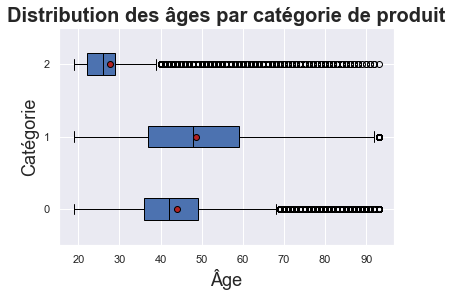

In [172]:
Modalites= transacn.categ.drop_duplicates().sort_values()
groupes = []
for m in Modalites:
    groupes.append(transacn[transacn["categ"]==m]["age"])
Medianpropos = {'color' :'black'}
Meanprops= {'marker' : 'o', 'markeredgecolor' : 'black', 'markerfacecolor' : 'firebrick'}
plt.boxplot(groupes,labels=Modalites, showfliers=True, medianprops= Medianpropos, vert = False, patch_artist= True, showmeans= True, meanprops=  Meanprops);
title_name = "Distribution des âges par catégorie de produit"
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.xlabel("Âge", fontsize = 18)
plt.ylabel("Catégorie", fontsize = 18)
plt.title(title_name, fontsize = 20, fontweight="bold");

On constate qu'il y a une assez grande dispersion au niveau des 3 échantillons avec énormément de variables en outliers hors des normes suivant les catégories. 

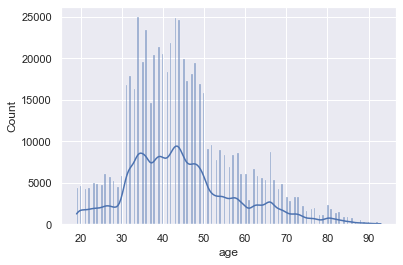

In [173]:
sns.histplot(data= transacn, x='age', kde=True);

Au vu de la distribution de l'histogramme, notre échantillon n'a pas du tout une forme de distribution Normale.

Le diagramme Quantile Quantile ou Q-Q permet d'évaluer visuellement la pertinence de l'ajustement d'une distribution à partir d'un modèle théorique, la droite rouge. Si les quantiles calculés suivent bien la distribution théorique, ils seront alors très proche de la droite théorique. Précédemment, la courbe ne suit pas une distribution normaliser mais plutôt une distribution asymétrique. 
Afin de m'assurer de distribution non paramétrique, je l'ai tout de même testé.

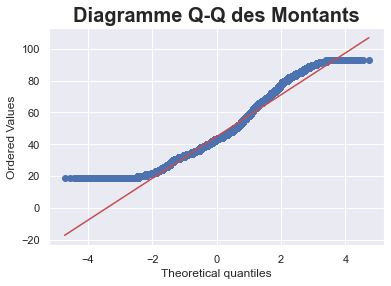

In [174]:
sps.probplot(transacn.age, plot=plt)
plt.title("Diagramme Q-Q des Montants", size= 20, fontweight="bold");


Au vu de la distribution de l'histogramme et du Q-Q, notre échantillon n'a pas une forme de distribution Normale. Pour Pouvoir m'entrainer, j'ai également fait un Test de Normalité pour apprivoiser cette méthode.

Il existe différents tests pour déterminer la normalité de la distribution de l'échantillon qui sont:

* Le test de Shapiro Wilk n<50 ou 5000
* Le test de Jarque-Bera (basé asymétrie et la Kurtose et la N)
* Le test de Kolmogorov-Smirnov (non paramétrique pour grand échantillon)
* Le test de Anderson-Darling (à partir distribution normale)

Je vais tester celui de Kolmogorov-Smirnov car la taille de l'échantillon est important.


#### TEST DE  Kolmogorov-Smirnov 

K-S statistic: 1.0
p-value: 0.0


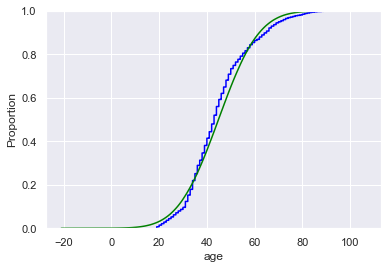

In [175]:
data_norm = np.random.normal(np.mean(transacn['age']), 
                             np.std(transacn['age']), 
                             len(transacn))
sns.ecdfplot(transacn['age'], c='blue')
sns.ecdfplot(data_norm, c='green')
result = (kstest(transacn['age'], cdf='norm'))
print(f"K-S statistic: {result[0]}")
print(f"p-value: {result[1]}")


Le Test de KOLMOGOROV SMIRNOV permet également de confirmer le rejet de cette normalité. 
H0= La distribution suit une loi Normale
H1= La distribution ne suit pas une loi Normale
#### Étape 1: Déterminer la taille de l'échantillon N 
n= 75 (taille de l'échantillon)
#### Étape 2: Choisir le seuil d'erreur 
Probabilité d'erreur à 5% Avec donc un rejet avec une p_value à 0.05
#### Étape 3: Déterminer le D critique suivant la table de la loi de KOLMOGOROV SMIRNOV 
Le D Critique pour un Risque à 5% est de 0,1496 environ (80)
#### Étape 4: Calculer le D calculé 
Le D statistics calculé est de 1.

D > D Critique Donc on rejette l'hypothèse Nulle de la normalité.

La P_Value est 0.0 plus petit que 0.05. On rejette donc bien l'Hypothèse nulle de normalité.


<div style="background-color: #37C3E6;">
    <a class="anchor" id="III.f.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#994D06;"> 2. Analyse de Corrélation Chi-2 </h2>
</div>

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.f.2.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Méthode chi-2 </h2>
</div>

In [176]:
def chi2(x, y, Tab):
    cont = Tab[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
    tx = cont.loc[:,["Total"]]
    ty = cont.loc[["Total"],:]
    n = len(Tab)
    indep = tx.dot(ty) / n
    measure = (cont-indep)**2/indep
    xi_n = measure.sum().sum()
    print("la valeur de khi 2 est : {}".format(round(xi_n,2)))
    table = (measure/xi_n)*100
    print(table)
    sns.heatmap(table.iloc[:-1,:-1],annot=cont.iloc[:-1,:-1],fmt='d')   
    plt.title("Différence Chi2 entre Table contingence et Table théorique",fontsize = 20, fontweight="bold")
    return(plt.show())

la valeur de khi 2 est : 238299.1
categ                  0         1          2  Total
age                                                 
 19-29 ans      5.731216  0.110614  66.215425    0.0
30-40 ans       2.076075  2.316180   1.546305    0.0
41-51 ans       2.098169  1.801473   3.130276    0.0
52-62 ans       1.906390  5.006552   0.926276    0.0
63-73 ans       1.239520  3.260154   0.608137    0.0
plus de 73 ans  0.502372  1.301538   0.223328    0.0
Total           0.000000  0.000000   0.000000    0.0


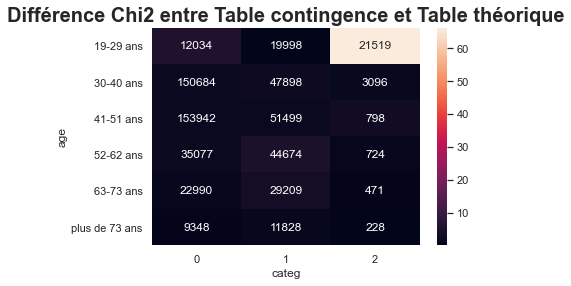

In [177]:
#CHI 2

X= "age"
Y= "categ"

chi2(X,Y, transacnage)

La valeur du Chi2 est de 238299.1. 

La heat map représente la différence entre ce qui est attendu si il n'y avait pas corrélation avec la réalité qui a ensuite été normalisé. 

Plus sa différence est importante plus elle est représentée en claire ce qui signifie qu'elles sont non indépendantes. 
Et inversement, plus la différence attendu est proche de celle de la réalité, plus elle est foncée. 

Ici, la heat map est assez peu visuelle concernant la dépendance entre l'âge et la catégorie. Seule la première tranche d'âge plus jeune se distinguerait à acheter apparemment en plus grande quantité la catégorie 2 que les autres tranches d'âges. 
Il y une également une légère dépendance qui favoriserait la tranche des 52-62 ans à acquérir des livres de catégorie 1 dont les valeurs de la table de contingence calculé sont plus importante.

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.f.2.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Test chi-2 </h2>
</div>

Afin de vérifier si l'échantillon est bien significatif pour conclure cette dépendance entre les 2 variables et non aléatoire, nous devons appliquer le test Chi2. 

Le test d'indépendance du chi2 permet de vérifier si des Variables sont dépendantes ou indépendantes. 

Les mesures sont bien indépendantes entre elles et il n'y a pas d'effectifs théoriques inférieurs à 5 dans les cases du tableau de contingence. Nous rentrons bien dans le cas d'un test paramétrique.

H0= Pas de corrélation entre l'age et la catégorie acheté

H1= Corrélation linéaire statistiquement significatif

<h2 style= "text-decoration:bold"> Etape 1: Déterminer le degré de liberté.  </h2


Degré de liberté= (nb ligne-1)  * (nb colonnes -1)

In [178]:
DDL= (6-1)*(3-1)
DDL

10

<h2 style= "text-decoration:bold"> Etape 2: Choisir le seuil d'erreur:  </h2

Probabilité d'erreur à 5%, 1% et 0,1%
Avec donc un rejet avec une p_value à 0.05, 0.01, et 0.001

<h2 style= "text-decoration:bold"> Etape 3: Déterminer le chi2 critique suivant la table du chi2  </h2

Valeur critique du Khi2 pour un degré de liberté de 6= 
   * 18.307 pour 5%
   * 23.209 pour 1%
   * 29.588 pour 0,1%

= 238299.1019466585 > 29.588 


On Constate que le chi2 calculé est significativement supérieur au chi2 critique supposé avec le seuil d'erreur le plus bas à 0,001. On rejette donc l'hypothèse nulle et valide l'hypothèse 1. 
 
 
Il y a donc bien une probable Corrélation entre l'âge et la catégorie de produit acheté. 

In [179]:
chi2, p_val, dof, expect = chi2_contingency(catgroupage)
print("la valeur chi2=",chi2,", la p_valeur=", p_val,", la valeur dof=", dof)

la valeur chi2= 238299.1019466585 , la p_valeur= 0.0 , la valeur dof= 10


In [180]:
print(expect)

[[ 33388.04014337  17830.07840043   2332.88145619]
 [125742.43543604  67149.71805648   8785.84650748]
 [128586.13305315  68668.32625398   8984.54069287]
 [ 50174.64716883  26794.56143256   3505.79139861]
 [ 32838.75323246  17536.74495996   2294.50180758]
 [ 13344.99096616   7126.57089658    932.43813726]]


Cette fonction Scipy qui utilise le tableau de contingence confirme bien le test du chi2. On retrouve le même chi2 et le même degré de liberté

La p_value est d'ailleurs largement inférieur à 0,01% ce qui signifie que la marge d'erreur est quasi nulle. 

<div style="background-color: #37C3E6;">
    <a class="anchor" id="III.f.3"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#994D06;"> 3. Analyse de Corrélation ANOVA  </h2>
</div>

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.f.3.1"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Méthode ANOVA</h2>
</div>

L'ANOVA ou "analyse de la variance", analyse comme son nom l'indique la variance entre les différents groupes(inter groupe) et au sein de chaque groupe(intra groupe). On peut également mesurer l'intensité de la relation entre les 2 variables en divisant la variation intra groupe par la variation totale de l'échantillon.

In [181]:
#ANOVA

X= transacn.categ
Y= transacn.age

eta_squared(transacn.categ, transacn.age)

'le Rapport de corrélation est 0.10006373281629333,     Variation inter11034113.779435474, Variation Totale 110270859.07031839, Variation intra99236745.29088292'

La variation moyenne est plus importante au sein des différentes catégories (intragroupe) que entre elle (intergroupe). Donc la corrélation est Faible car proche de 0. Seul 10% de la variabilité est expliqué par la catégorie.

<div style="background-color: #3BDBD9;">
    <a class="anchor" id="III.f.3.2"></a>
<h2 style="text-align: center; text-decoration:bold; margin: auto; padding: 5px; color:#A8440C;"> Test Corrélations </h2>
</div>

Pour pouvoir vérifier si la corrélation est statistiquement significatif, il est nécessaire de mettre en place un test adapté aux variables analysées. Étant donné que nous analysons une variable quantitative et Qualitative, 3 tests peuvent être utilisé pour le tester:

* Le test de student si la variable qualitative n’a pas plus de deux valeurs qui est paramétrique
*	Le test d'ANOVA Fisher si la variable qualitative a plus de 2 valeurs qui suit un test paramétrique (indépendantes, variances égales, +20 individus suivant une loi normale pour chaque groupe)
*	Le test de KRUSKAL-WALLIS qui suit un test non paramétrique.

L'échantillon actuel possède une variable qualitative avec 4 groupes mais ne suit pas une distribution Normale. Le test de Fisher ne serait donc pas adapté pour notre analyse. Mais j'ai tout de même souhaité le tester.


H0= Pas de corrélation entre l'age et la catégorie acheté

H1= Corrélation linéaire statistiquement significatif

## TEST DE FISHER

<h2 style= "text-decoration:bold"> Etape 1: Déterminer le degré de liberté.  </h2


Degré de liberté= 
    
    DDL inter Numérateur= nb de groupes-1  = 3-1 = 2
    
    DDL intra Dénominateur= nb d'observations -nb groupes = 616017-3 = 616014
        
ddl(2, 616014)
     

    
<h2 style= "text-decoration:bold"> Etape 2: Choisir le seuil d'erreur </h2

Probabilité d'erreur à 5%
Avec donc un rejet avec une p_value à 0.05

<h2 style= "text-decoration:bold"> Etape 3: Déterminer le F critique suivant la table de la loi de Fisher </h2

Valeur critique de F pour un degré de liberté de F(2, 616014)= 
    
    * 3,018

   
<h2 style= "text-decoration:bold"> Etape 4: Calculer le F calculé </h2
    
    F= Variance entre les groupes inter / Variance dans les groupes intra

In [182]:
#F variance inter normalisé / variance intra normalié
F= (11034113.779435474/2 ) / (99236745.29088292/ 616014)
F

34247.236473754216

Rejet H0 car F > 3,018  

Échantillon est très significatif car le F calculé est supérieur au F critique.

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ 

In [183]:
mod = ols('age ~ categ', data=transacn).fit()
aov_table= sm.stats.anova_lm(mod, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
categ,2.0,1.103411e+07,5.517057e+06,34247.236474,0.0
Residual,616014.0,9.923675e+07,1.610950e+02,NaN,NaN


Categ= Variation intergroupe		

Residual= Variation intragroupe

df= degré de liberté = 2 et 616014.0

sum_sq= somme des carrés

mean_sq= Moyenne des Carrés. = somme carré / degré de liberté

F = F stat = Carré Moyen Inter / Carré Moyen Intra = 34247.236474

PR(>F)= P_value = 0.0


F calculé 34247.236474 > F critique 3,018

Cette fonction confirme bien le test de Fisher. On retrouve la même valeur de F et le même degré de liberté. La p_value est d'ailleurs largement inférieur à 0,01%.

Ce test Rejette donc bien l'indépendance entre ces 2 facteurs. Malgré la faible corrélation calculé avec l'ANOVA, il y a bien une potentielle influence qui génère cette dépendance. 

Cependant, comme nous avons pu voir l'échantillon ne suit pas une distribution Normale. Donc cette conclusion ne peut être Valide. Je vais donc appliquer le test le plus adapté pour ce type d'échantillon, le test de KRUSKAL-WALLIS. 

## TEST DE KRUSKAL-WALLIS

<h2 style= "text-decoration:bold"> Etape 1: Déterminer le degré de liberté et le K et autres.  </h2

    K= Nombre de groupes = 3
    DDL inter Numérateur= nb de groupes-1  = 3-1 = 2
    N= Taille échantillon total = 616017
    N1= Taille de l'échantillon +1 = 616018
    Rbarre= (N * N1)/2
    Total0= 384075
    Total1= 205106
    Total2= 26836
    
<h2 style= "text-decoration:bold"> Etape 2: Choisir le seuil d'erreur </h2

Probabilité d'erreur à 5%
Avec donc un rejet avec une p_value à 0.05

<h2 style= "text-decoration:bold"> Etape 3: Déterminer le H critique suivant la table de la loi de KRUSKAL-WALLIS </h2

Valeur critique de K =3 et des Samples Sizes à 8+= 
    
    * 5,805 pour P_value 5%
    * 8.465 Pour P_value 1%

   
<h2 style= "text-decoration:bold"> Etape 4: Calculer le H calculé </h2
    
basé sur le rang de chaque couple de groupe. 
    exemple= rang 1 pour l'age avec la taille de l'échantillon le plus bas du groupe.
    
    (N-1) ((Total0*(Mediangroupe1  - Rbarre)**2)  idem groupe2+ groupe3) / (rangcouple1 - rbarre)**2 + idem rangcouple2 etc..)

In [184]:
kruskal(data= transacn, dv='age', between='categ')

,Source,ddof1,H,p-unc
Kruskal,categ,2,63314.39857,0.0


la H calculé 63314.39857 > H critique 8.465. 

On constate également que la P_value Unilatérale < 0.005 donc on rejette bien l'Hypothèse 0.

Il y aurait bien une corrélation entre l'âge du client et la catégorie acheté. 

# Conclusion

La Corrélation qui ressort le plus est celle entre l'âge et la catégorie de livre acheté. 
Ensuite, on y retrouve la corrélation entre l'âge et la taille du panier Moyen. 

Au vu de ces analyses des idées peuvent être proposés afin d'améliorer le montant du chiffre d'affaires dans les années à venir. 

La premiere proposition s'axerai principalement sur les profils professionnels en nous adaptant mieux à ce type de clientel. 

Ensuite au vu des analyses de corrélations par rapport à l'âge, il serait intéssant de proposer des offres plus ciblées suivant la tranche d'âge de la personne. 


* [I. Importation](#I)


* [II. les différents indicateurs de ventes](#II)
    * [a) Chiffre d'affaires](#II.a)    
         * [1-Descriptive](#II.a.1)
             * [i. Total](#II.a.1.i)
             * [ii. centrale](#II.a.1.ii)
             * [iii. Forme](#II.a.1.iii)
             * [iv. Dispersion](#II.a.1.iv)
         *[2-Temporelle](#II.a.2)
             * [i. Croissance](#II.a.2.i)
             * [ii. Moyenne par an](#II.a.2.ii)
             * [iii. Répartition dans le temps](#II.a.2.iii) 
                     * Evolution du Chiffre d'Affaires par Catégorie
                     * Evolution du Chiffre d'Affaires global
                     * Evolution du Chiffre d'Affaires moyen
                     * coefficient saisonnier
             * [iv. Prévision](#II.a.2.iv)
         *[3-Répartition](#II.a.3)
             * [i. demande par Catégorie](#II.a.3.i)
             * [ii. Part de marché](#II.a.3.ii)  
             
    * [b) Références](#II.b)
        * [1. Descriptive](#II.b.1)
        * [2. Répartition](#II.b.2)
            * [i. Nombre de références Uniques](#II.b.2.i)
            * [ii. Distribution des prix](#II.b.2.ii)
            * [iii. Demande par catégorie](#II.b.2.iii)
            * [iv. demande en volume](#II.b.2.iv)
            * [iii. Distribution des ventes](#II.b.2.v)
            * [iv. top10](#II.b.2.vi)
            * [v. Flop10](#II.b.2.vii)
        * [3.Temporelle](#II.b.3)
        * [4. Causalité](#II.b.4)
            * [i. Flop](#II.b.4.i)
              
    * [c) Profils](#II.c)
        * [1.Profilage](#II.c.1)
            * [i. Nombre de client](#II.c.1.i)
            * [ii. Démographie](#II.c.1.ii)
        * [2.Montant](#II.c.2)
            * [i. Répartition](#II.c.2.i)
            * [ii. Chiffre d'affaires](#II.c.2.ii)
            * [iii. Panier Moyen](#II.c.2.iii)
            * [iv. Top Client](#II.c.2.iv)   
        * [3. Fréquence](#II.c.3)
            * [i. Catégorie](#II.c.3.i)
            * [ii. Nombre de visites](#II.c.3.ii)
            * [iii.CLTV](#II.c.3.iii)
            * [iv. Scoring RFM](#II.c.3.iv)
            
            
* [III.Corrélations sur les clients](#III)
    * [a) Préparation](#III.a)
        * [1. Nettoyage](#III.a.1)
        * [2. Création des formules d'analyses](#III.a.2)
        * [3. Création d'une formule de catégorie](#III.a.3)

    * [b) Corrélation sur le genre par rapport à la catégorie](#III.b)
        * [1. Préparation de la table pour analyse](#III.b.1)
        * [2. Analyse de Corrélation chi-2](#III.b.2)
            * [Méthode Chi-2](#III.b.2.1)
        * [3. Vérifier l'applicabilité du test chi-2](#III.b.3)
        
    * [c) Corrélation sur l'âge par rapport au montant](#III.c)
        * [1. Préparation de la table pour analyse](#III.c.1)
            * [Table Version Variables Quantitatives](#III.c.1.1)
            * [TEST DE NORMALITE VARIABLES QUANTITATIVES](#III.c.1.2)
            * [Table Version Variables Quantitative/ Qualitative](#III.c.1.3)
            * [TEST DE NORMALITE VARIABLES QUANTITATIVE/ QUALITATIVE](#III.c.1.4)
        * [2. Analyse de Corrélation de variables quantitatives](#III.c.2)
            * [Méthode Covariance](#III.c.2.1)
            * [Méthode de Pearson ou de Spearman](#III.c.2.2)
            * [Méthode de Régression](#III.c.2.3)
            * [Tester la Corrélation](#III.c.2.4)
        * [3. Analyse de Corrélation par ANOVA](#III.c.3)
            * [Méthode ANOVA](#III.c.3.1) 
            * [Test de Fisher](#III.c.3.2) 
            
    * [d) Corrélation sur l'âge par rapport à la Fréquence d'achat](#III.d)
        * [1. Préparation de la table pour analyse](#III.d.1)
        * [2. Analyse de Corrélation par ANOVA](#III.d.2)
            * [Méthode ANOVA](#III.d.2.1) 
            * [Test de Fisher](#III.d.2.2) 
        
    * [e) Corrélation sur l'âge par rapport au panier Moyen](#III.e)
        * [1. Préparation de la table pour analyse](#III.e.1)
        * [2. Analyse de Corrélation par ANOVA](#III.e.2)
            * [Méthode ANOVA](#III.e.2.1) 
            * [Test de Fisher](#III.e.2.2) 
        
    * [f) Corrélation sur l'âge par rapport à la catégorie de livre acheté](#III.f)
        * [1. Préparation de la table pour analyse](#III.f.1)
        * [2. Analyse de Corrélation par CHI-2](#III.f.2)
            * [Méthode Chi-2 ](#III.f.2.1)
            * [Test de chi-2](#III.f.2.2)
        * [3. Analyse de Corrélation par ANOVA](#III.f.3)
            * [Méthode ANOVA](#III.f.3.1) 
            * [Test de Fisher](#III.f.3.2) 
 